# 

In [1]:
import tensorflow as tf
print(tf.__version__)


2.0.0-dev20190213


In [2]:
print(tf.__file__ )

C:\Windows\system32\env002\lib\site-packages\tensorflow\__init__.py


# work: model  9 10

In [3]:
#tf.enable_eager_execution()

In [4]:
tf.executing_eagerly()


True

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydot_ng
import timeit
%matplotlib inline
import datetime

In [6]:
import mpld3
mpld3.enable_notebook()

In [7]:
data_dir = r'D:\python_code\data\stock\^NYA'
fname = os.path.join(data_dir, 'NYA 1981 2018 technical_custom_loss4.csv')
df = pd.read_csv(fname)
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          1   836.17   836.17  836.17          0   
1981-01-06  836.81         0          1   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         1          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

In [8]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [9]:
df_idx.head(5)

Close  vex_sign  cave_sign   <Open>   <High>   <Low>   <Volume>  \
Date                                                                           
1981-01-02  827.50         0          0   827.50   827.50  827.50          0   
1981-01-05  836.17         0          1   836.17   836.17  836.17          0   
1981-01-06  836.81         0          1   836.81   836.81  836.81          0   
1981-01-07  817.24         1          0   817.24   817.24  817.24          0   
1981-01-08  805.72         1          0   805.72   805.72  805.72          0   

             <ParCl>   <FastAvg>   <SlowAvg>  ...   INDPRO       RPI  PERMIT  \
Date                                          ...                              
1981-01-02       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-05       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-06       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-07       0.0         0.0         0.0  ...  52.4688  5723.536    1221   
1981-01-08       0.0         0.0         0.0  ...  52.4688  5723.536    1221   

            PAYEMS    ICSA  AWHMAN  PPIACO  USSLIND  STLFSI  USREC  
Date                                                                
1981-01-02   91037  399000    40.1    95.2      0.0     0.0      0  
1981-01-05   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-06   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-07   91037  410000    40.1    95.2      0.0     0.0      0  
1981-01-08   91037  410000    40.1    95.2      0.0     0.0      0  

[5 rows x 48 columns]

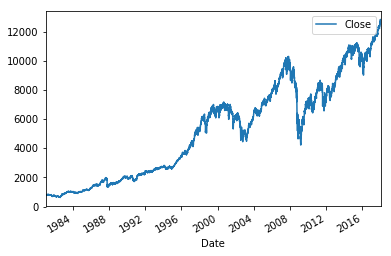

In [10]:
data = df_idx
data.plot(y='Close')

In [11]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1981 to %d"%(1981 + int(0.8*years)))
print(diff)
delay = 5

total data days: 13510.0
Total data: 37 years
80 percent data = 1981 to 2010
1167264000000000000 nanoseconds


In [12]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2011')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)
train_date = train.index
train_date = pd.to_datetime(train_date)

In [13]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

C:\Windows\system32\env002\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
#without sc
#train_sc = train
#test_sc = test

In [15]:
train_sc.shape

(7570, 48)

In [16]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [17]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        1.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        1.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       1.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        1.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        1.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        1.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       1.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       1.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       1.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       1.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       1.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       1.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       1.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       1.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        1.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        1.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        1.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       1.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       1.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       1.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        1.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        1.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       1.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       1.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       1.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        1.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        1.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       1.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        1.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        1.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        1.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        1.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [18]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        1.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       1.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       1.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        1.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        1.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       1.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        1.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        1.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        1.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        1.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       1.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        1.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        1.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        1.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        1.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        1.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        1.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       1.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        1.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        1.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        1.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        1.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [19]:
for s in range(-delay,-delay+1):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [20]:
train_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
1981-01-02  0.021235       0.0        0.0  0.021235  0.021070  0.021381   
1981-01-05  0.022129       0.0        1.0  0.022129  0.021958  0.022282   
1981-01-06  0.022195       0.0        1.0  0.022195  0.022024  0.022348   
1981-01-07  0.020176       1.0        0.0  0.020176  0.020020  0.020315   
1981-01-08  0.018987       1.0        0.0  0.018987  0.018840  0.019118   
1981-01-09  0.019249       0.0        1.0  0.019249  0.019100  0.019382   
1981-01-12  0.019336       0.0        1.0  0.019336  0.019186  0.019469   
1981-01-13  0.019150       1.0        0.0  0.019150  0.019002  0.019282   
1981-01-14  0.019369       0.0        1.0  0.019369  0.019219  0.019502   
1981-01-15  0.019849       0.0        1.0  0.019849  0.019695  0.019985   
1981-01-16  0.020220       0.0        1.0  0.020220  0.020064  0.020360   
1981-01-19  0.019968       1.0        0.0  0.019968  0.019814  0.020106   
1981-01-20  0.018343       1.0        0.0  0.018343  0.018201  0.018469   
1981-01-21  0.018102       1.0        0.0  0.018103  0.017962  0.018227   
1981-01-22  0.017415       1.0        0.0  0.017415  0.017280  0.017535   
1981-01-23  0.017372       1.0        0.0  0.017372  0.017237  0.017492   
1981-01-26  0.017077       1.0        0.0  0.017077  0.016944  0.017194   
1981-01-27  0.017885       0.0        1.0  0.017885  0.017746  0.018008   
1981-01-28  0.017437       1.0        0.0  0.017437  0.017302  0.017557   
1981-01-29  0.017339       1.0        0.0  0.017339  0.017205  0.017458   
1981-01-30  0.016881       1.0        0.0  0.016881  0.016750  0.016997   
1981-02-02  0.015134       1.0        0.0  0.015134  0.015017  0.015239   
1981-02-03  0.016019       0.0        1.0  0.016019  0.015895  0.016129   
1981-02-04  0.016193       0.0        1.0  0.016193  0.016068  0.016305   
1981-02-05  0.016924       0.0        1.0  0.016924  0.016793  0.017041   
1981-02-06  0.017491       0.0        1.0  0.017492  0.017356  0.017612   
1981-02-09  0.016640       1.0        0.0  0.016640  0.016511  0.016755   
1981-02-10  0.016564       1.0        0.0  0.016564  0.016436  0.016678   
1981-02-11  0.016007       1.0        0.0  0.016008  0.015884  0.016118   
1981-02-12  0.015549       1.0        0.0  0.015549  0.015429  0.015656   
...              ...       ...        ...       ...       ...       ...   
2010-11-18  0.722218       0.0        1.0  0.708696  0.718258  0.713579   
2010-11-19  0.724400       0.0        1.0  0.722221  0.718850  0.720675   
2010-11-22  0.721223       1.0        0.0  0.724402  0.718793  0.717531   
2010-11-23  0.706824       1.0        0.0  0.721227  0.715642  0.709336   
2010-11-24  0.718020       0.0        1.0  0.706830  0.712482  0.711700   
2010-11-26  0.709896       1.0        0.0  0.718024  0.712464  0.713557   
2010-11-29  0.708121       1.0        0.0  0.709900  0.704403  0.703271   
2010-11-30  0.702713       1.0        0.0  0.708122  0.702639  0.702845   
2010-12-01  0.720545       0.0        1.0  0.702719  0.715562  0.707560   
2010-12-02  0.731745       0.0        1.0  0.720550  0.726345  0.725514   
2010-12-03  0.735803       0.0        1.0  0.731753  0.730542  0.734697   
2010-12-06  0.734680       1.0        0.0  0.735808  0.730421  0.737063   
2010-12-07  0.734571       1.0        0.0  0.734692  0.737713  0.739344   
2010-12-08  0.735673       0.0        1.0  0.734576  0.732390  0.735815   
2010-12-09  0.738957       0.0        1.0  0.735679  0.734444  0.740117   
2010-12-10  0.743205       0.0        1.0  0.738962  0.737652  0.742864   
2010-12-13  0.745963       0.0        1.0  0.743212  0.743988  0.748332   
2010-12-14  0.746499       0.0        1.0  0.745968  0.744327  0.749392   
2010-12-15  0.740675       1.0        0.0  0.746504  0.741767  0.744724   
2010-12-16  0.744953       0.0        1.0  0.740624  0.739401  0.743900   
2010-12-17  0.744444       1.0        0.

In [21]:
test_sc_df

Close  vex_sign  cave_sign    <Open>    <High>     <Low>  \
Date                                                                      
2011-01-03  0.765978       0.0        1.0  0.757734  0.762863  0.762954   
2011-01-04  0.763730       1.0        0.0  0.765986  0.761960  0.763485   
2011-01-05  0.765573       0.0        1.0  0.763734  0.760090  0.763599   
2011-01-06  0.761533       1.0        0.0  0.765576  0.760625  0.765030   
2011-01-07  0.759410       1.0        0.0  0.761538  0.757786  0.758497   
2011-01-10  0.757941       1.0        0.0  0.759413  0.753533  0.757270   
2011-01-11  0.763368       0.0        1.0  0.757948  0.758773  0.763170   
2011-01-12  0.774132       0.0        1.0  0.763380  0.768532  0.768640   
2011-01-13  0.773766       1.0        0.0  0.774137  0.770802  0.777234   
2011-01-14  0.779410       0.0        1.0  0.773769  0.773379  0.776632   
2011-01-18  0.781143       0.0        1.0  0.779416  0.775486  0.783895   
2011-01-19  0.772268       1.0        0.0  0.781146  0.776054  0.775931   
2011-01-20  0.769358       1.0        0.0  0.772267  0.766287  0.768274   
2011-01-21  0.772354       0.0        1.0  0.769363  0.771086  0.774663   
2011-01-24  0.777686       0.0        1.0  0.772356  0.772245  0.776860   
2011-01-25  0.776005       1.0        0.0  0.777689  0.771667  0.775139   
2011-01-26  0.781424       0.0        1.0  0.776018  0.776472  0.781365   
2011-01-27  0.782809       0.0        1.0  0.781429  0.778334  0.785025   
2011-01-28  0.767905       1.0        0.0  0.782814  0.777079  0.772429   
2011-01-31  0.775802       0.0        1.0  0.767911  0.770803  0.773201   
2011-02-01  0.791378       0.0        1.0  0.775811  0.785856  0.781156   
2011-02-02  0.789570       1.0        0.0  0.791380  0.786347  0.793940   
2011-02-03  0.791271       0.0        1.0  0.789574  0.785829  0.788143   
2011-02-04  0.791214       1.0        0.0  0.791277  0.785149  0.791312   
2011-02-07  0.796182       0.0        1.0  0.791223  0.792077  0.796674   
2011-02-08  0.800641       0.0        1.0  0.796188  0.794529  0.800151   
2011-02-09  0.796941       1.0        0.0  0.800646  0.794446  0.798721   
2011-02-10  0.796233       1.0        0.0  0.796940  0.790890  0.794649   
2011-02-11  0.800129       0.0        1.0  0.796237  0.795120  0.797131   
2011-02-14  0.803252       0.0        1.0  0.800134  0.797521  0.804999   
...              ...       ...        ...       ...       ...       ...   
2017-11-16  1.205541       0.0        1.0  1.200956  1.198120  1.209230   
2017-11-17  1.205501       1.0        0.0  1.203278  1.197382  1.211156   
2017-11-20  1.207346       0.0        1.0  1.205898  1.199061  1.212990   
2017-11-21  1.214067       0.0        1.0  1.210636  1.205843  1.218976   
2017-11-22  1.214576       0.0        1.0  1.216164  1.207833  1.221857   
2017-11-24  1.217786       0.0        1.0  1.217976  1.209363  1.225921   
2017-11-27  1.214572       1.0        0.0  1.217730  1.208915  1.222897   
2017-11-28  1.227931       0.0        1.0  1.216784  1.218779  1.224904   
2017-11-29  1.232171       0.0        1.0  1.228900  1.224530  1.237367   
2017-11-30  1.239032       0.0        1.0  1.235794  1.234145  1.243122   
2017-12-01  1.237666       1.0        0.0  1.239961  1.231645  1.230538   
2017-12-04  1.239764       0.0        1.0  1.245023  1.239347  1.248104   
2017-12-05  1.232774       1.0        0.0  1.239857  1.230733  1.240478   
2017-12-06  1.229190       1.0        0.0  1.231028  1.223076  1.236835   
2017-12-07  1.232962       0.0        1.0  1.227674  1.224697  1.235546   
2017-12-08  1.240607       0.0        1.0  1.236687  1.231014  1.243400   
2017-12-11  1.243203       0.0        1.0  1.241651  1.233694  1.250002   
2017-12-12  1.246254       0.0        1.0  1.244499  1.238588  1.252469   
2017-12-13  1.246430       0.0        1.0  1.247426  1.240914  1.255024   
2017-12-14  1.239163       1.0        0.0  1.247191  1.238254  1.247708   
2017-12-15  1.246450       0.0        1.

In [22]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-'+str(delay), axis=1)
y_train = train_sc_df.dropna()['Y_-'+str(delay)]
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()


C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [23]:
X_train

array([[0.02123455, 0.        , 0.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.0221293 , 0.        , 1.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       [0.02219534, 0.        , 1.        , ..., 0.44481605, 0.1198527 ,
        0.        ],
       ...,
       [0.75175002, 0.        , 1.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75439815, 0.        , 1.        , ..., 0.68896321, 0.03615668,
        0.        ],
       [0.75373767, 1.        , 0.        , ..., 0.68896321, 0.03615668,
        0.        ]])

In [24]:
X_train.shape

(7565, 48)

In [25]:
y_train.shape

(7565,)

In [26]:
X_test = test_sc_df.dropna().drop('Y_-'+str(delay), axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-'+str(delay)]
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()


C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Windows\system32\env002\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [27]:
y_train

array([0.01924897, 0.01933566, 0.0191499 , ..., 0.75746527, 0.75647764,
       0.7577274 ])

In [28]:
X_test

array([[ 0.76597828,  0.        ,  1.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76372954,  1.        ,  0.        , ...,  0.67892977,
         0.02360228,  0.        ],
       [ 0.76557271,  0.        ,  1.        , ...,  0.67892977,
         0.02360228,  0.        ],
       ...,
       [ 1.25138934,  1.        ,  0.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25139037,  0.        ,  1.        , ...,  0.68060201,
        -0.1282223 ,  0.        ],
       [ 1.25682491,  0.        ,  1.        , ...,  0.68060201,
        -0.1282223 ,  0.        ]])

In [29]:
y_test

array([0.75794103, 0.76336834, 0.77413216, ..., 1.25907262, 1.26228216,
       1.25771553])

In [30]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7565 x 48)
Test size: (1756 x 48)


# setup

In [31]:
loss_imagepath ='images/loss/'
predict_imagepath ='images/predict/'
losspath = 'csv/loss/'
if (not (os.path.exists(losspath))):
        os.makedirs(losspath)
model_dirpath = 'h5/'
file_name='file_name'

#for func initiate
history_model='history_model'
input_tensor='input_tensor'
y_pred='y_pred'
Target_DirPath='Target_DirPath'
test_date_trim='test_date_trim'
train_date_trim='train_date_trim'


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Add,Reshape,Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras.backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping,CSVLogger
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Input,layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import PReLU
from tensorflow.keras.utils import plot_model
K.clear_session()
#from tcn import compiled_tcn,TCN

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1
penalty=0.1

In [33]:
def plot_model_architecture(model, file_name):
    file_path = 'images/model/{}.png'.format(file_name)
    if not os.path.exists(os.path.dirname(file_path)):
        try:
            os.makedirs(os.path.dirname(file_path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    plot_model(model, to_file=file_path, show_shapes=True, show_layer_names=False)

In [34]:
def loadmodel(model_dirpath=model_dirpath,file_name=file_name):
    model = load_model(model_dirpath + file_name + '.h5')
    return model
def loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name):
    import matplotlib.pyplot as plt
    loss = history_model.history['loss']
    val_loss = history_model.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    if (not (os.path.exists(loss_imagepath))):
                os.makedirs(loss_imagepath)
    plt.savefig(loss_imagepath +  file_name +'_loss.png')
    plt.show()    

def CSV(losspath=losspath, file_name=file_name):
    csv_logger = CSVLogger(losspath + file_name + '_log.csv')
    return csv_logger
def predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  predict_imagepath=predict_imagepath, file_name=file_name):
    from sklearn.metrics import r2_score
    y_pred = model.predict([X_tst_t])
    #y_pred是三天前就知道，所以往前移三格
    y_test_pic = y_test[:]
    y_pred_pic = y_pred[delay:]
    y_test_rsquare = y_test[:]
    plt.plot(y_test_pic, label='True')
    plt.plot(y_pred_pic, label='pred')
    plt.xlabel('Observation')
    plt.ylabel('Scaled_Value')
    plt.legend()
    print("y_pred.shape:",y_pred.shape)
    print("y_test_rsquare.shape:",y_test_rsquare.shape)
    r2_test = r2_score(y_test_rsquare, y_pred)
    print('R-Squared: %f'%(r2_test))
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
          .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
    if (not (os.path.exists(predict_imagepath))):
            os.makedirs(predict_imagepath)
    plt.savefig(predict_imagepath +  file_name +'_loss.png')
    plt.show()    
    return y_pred
def save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,\
             file_name=file_name,test_date=test_date):
    # 把價格縮放解除
    ## create empty table with label fields
    y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_data_like[:,0] = y_pred[:,0]
    ## inverse transform and then select the right field
    y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_test.shape[0]

    # 把價格轉換維度
    yd = y_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    test_date_trim = np.delete(test_date, np.s_[-delay:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(test_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'.csv', mode='w', header=True, index=False)
    
def save_train_csv(file_name=file_name):
    y_train_pred = model.predict([X_tr_t])
    # 把價格縮放解除
    ## create empty table with label fields
    y_train_pred_data_like = np.zeros(shape=(len(y_train_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_train_pred_data_like[:,0] = y_train_pred[:,0]
    ## inverse transform and then select the right field
    y_train_pred_data = sc.inverse_transform(y_train_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_train.shape[0]

    # 把價格轉換維度
    yd = y_train_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    train_date_trim = np.delete(train_date, np.s_[-delay:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(train_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master-train/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'_train.csv', mode='w', header=True, index=False)    

# tcn

In [35]:
act_of_skip_connections='selu'
import tensorflow.keras.backend as K
import tensorflow.keras.layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Activation, Lambda
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Convolution1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input

from typing import List, Tuple


def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return tensorflow.keras.layers.multiply([tanh_out, sigm_out])


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = tensorflow.keras.layers.add([original_x, x])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


class TCN:
    """Creates a TCN layer.

        Input shape:
            A tensor of shape (batch_size, timesteps, input_dim).

        Args:
            nb_filters: The number of filters to use in the convolutional layers.
            kernel_size: The size of the kernel to use in each convolutional layer.
            dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
            nb_stacks : The number of stacks of residual blocks to use.
            activation: The activations to use (norm_relu, wavenet, relu...).
            padding: The padding to use in the convolutional layers, 'causal' or 'same'.
            use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
            return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
            dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
            name: Name of the model. Useful when having multiple TCN.

        Returns:
            A TCN layer.
        """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs, Activation_of_skip_connections='selu'):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = tensorflow.keras.layers.add(skip_connections)
        x = Activation(Activation_of_skip_connections)(x)

        if not self.return_sequences:
            output_slice_index = -1
            x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
        return x


def compiled_tcn(num_feat,  # type: int
                 num_classes,  # type: int
                 nb_filters,  # type: int
                 kernel_size,  # type: int
                 dilations,  # type: List[int]
                 nb_stacks,  # type: int
                 max_len,  # type: int
                 activation='norm_relu',  # type: str
                 padding='causal',  # type: str
                 use_skip_connections=True,  # type: bool
                 return_sequences=True,
                 regression=False,  # type: bool
                 dropout_rate=0.05,  # type: float
                 name='tcn'  # type: str
                 ):
    # type: (...) -> tensorflow.keras.Model
    """Creates a compiled TCN model for a given task (i.e. regression or classification).

    Args:
        num_feat: The number of features of your input, i.e. the last dimension of: (batch_size, timesteps, input_dim).
        num_classes: The size of the final dense layer, how many classes we are predicting.
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        max_len: The maximum sequence length, use None if the sequence length is dynamic.
        activation: The activations to use.
        padding: The padding to use in the convolutional layers.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        regression: Whether the output should be continuous or discrete.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A compiled keras TCN.
    """

    dilations = process_dilations(dilations)

    input_layer = Input(shape=(max_len, num_feat))

    x = TCN(nb_filters, kernel_size, nb_stacks, dilations, activation,
            padding, use_skip_connections, dropout_rate, return_sequences, name)(input_layer)

    print('x.shape=', x.shape)

    if not regression:
        # classification
        x = Dense(num_classes)(x)
        x = Activation('softmax')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)

        # https://github.com/keras-team/keras/pull/11373
        # It's now in Keras@master but still not available with pip.
        # TODO To remove later.
        def accuracy(y_true, y_pred):
            # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
            if K.ndim(y_true) == K.ndim(y_pred):
                y_true = K.squeeze(y_true, -1)
            # convert dense predictions to labels
            y_pred_labels = K.argmax(y_pred, axis=-1)
            y_pred_labels = K.cast(y_pred_labels, K.floatx())
            return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss='sparse_categorical_crossentropy', metrics=[accuracy])
        print('Adam with norm clipping.')
    else:
        # regression
        x = Dense(1)(x)
        x = Activation('linear')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)
        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss=tf_stock_loss_9)

    return model

# loss func

In [36]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [37]:
def tf_stock_loss_9(y_true, y_pred):
    #indices = tf.constant([[0]])
    #updates = tf.constant([False])
    indices = tf.constant([[-1],[-2],[-3],[-4],[-5]])
    updates = tf.cast(tf.constant([0,0,0,0,0]),tf.float32)

    y_pred_tobemodified0 = tf.reshape(y_pred, [-1])
    y_pred_tobemodified1 = tf.roll(y_pred_tobemodified0, shift=-5, axis=0)
    y_pred_previous_cl = tf.tensor_scatter_update(y_pred_tobemodified0, indices, updates)
    y_pred_cl = tf.tensor_scatter_update(y_pred_tobemodified1, indices, updates)
    y_pred_previous = tf.reshape(y_pred_previous_cl,tf.shape(y_pred))
    y_pred_dummy = tf.reshape(y_pred_cl,tf.shape(y_pred))
    
    y_pred_rising = K.less(y_pred_previous, y_pred_dummy)
    y_pred_falling = K.greater(y_pred_previous, y_pred_dummy)    


    y_true_tobemodified0 = tf.reshape(y_true, [-1])
    y_true_tobemodified1 = tf.roll(y_true_tobemodified0, shift=-5, axis=0)
    y_true_previous_cl = tf.tensor_scatter_update(y_pred_tobemodified0, indices, updates)
    y_true_cl = tf.tensor_scatter_update(y_true_tobemodified1, indices, updates)
    y_true_previous = tf.reshape(y_true_previous_cl,tf.shape(y_true))
    y_true_dummy = tf.reshape(y_true_cl,tf.shape(y_true))
    
    y_true_rising = K.less(y_true_previous, y_true_dummy)
    y_true_falling = K.greater(y_true_previous, y_true_dummy)  

    loss = tf.keras.backend.cast(tf.logical_and(y_true_falling,y_pred_rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
             tf.keras.backend.cast(tf.logical_and(y_true_rising,y_pred_falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
             mean_squared_error(y_true, y_pred)       

    return loss

In [38]:
def custom_r2_score(file_name):
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    file_end_with = '.csv'
    #above need to be adjust
    df_for_eval= pd.read_csv(Target_DirPath + file_name + file_end_with)
    df_for_eval['Date'] = pd.to_datetime(df_for_eval["Date"])
    df_for_eval = df_for_eval.set_index(["Date"], drop=True)

    y_pred_for_eval = df_for_eval["Close"]
    print(y_pred_for_eval.shape)
    ## create empty table with label fields
    y_pred_for_eval_data_like = np.zeros(shape=(len(y_pred_for_eval), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_for_eval_data_like[:,0] = y_pred_for_eval[:]
    ## transform and then select the right field
    y_pred_for_eval_data = sc.transform(y_pred_for_eval_data_like)[:,0]

    r2_test = r2_score(y_test, y_pred_for_eval_data)
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

    y_test_diff = np.diff(y_test) #y_test[i]與y_test[i-1]差異
    y_pred_for_eval_data_diff = np.diff(y_pred_for_eval_data)#y_pred[i]與y_pred[i-1]差異
    rsquare_product = y_test_diff*y_pred_for_eval_data_diff #兩者相乘
    def return_same_sign_bool(d):
        d = np.array(d)
        return np.where(d > 0, 1, 0)
    rsquare_product_bool = return_same_sign_bool(rsquare_product) #如果兩者相乘為正數回傳1，非正數回傳0
    print("The Custom  sign score on the Test set is:\t{:0.3f}"\
              .format((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))) 
               #計算y_test及y_pred變動同向機率
    print("The Custom  R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])/2 
                      + ((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))/2 ))


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 32)        1568        input_1[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 32)        2080        tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, 1, 32)        0           tcn_d_causal_conv_1_tanh_s0[0][0]
______________________________________________________________________________________________

Epoch 10/300
6808/6808==============================] - 4s 622us/sample - loss: 0.0139 - val_loss: 0.0184
Epoch 11/300
6808/6808==============================] - 4s 625us/sample - loss: 0.0115 - val_loss: 0.0253
Epoch 12/300
6808/6808==============================] - 4s 629us/sample - loss: 0.0100 - val_loss: 0.0180
Epoch 13/300
6808/6808==============================] - 4s 635us/sample - loss: 0.0085 - val_loss: 0.0224
Epoch 14/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0069 - val_loss: 0.0190
Epoch 15/300
6808/6808==============================] - 4s 605us/sample - loss: 0.0062 - val_loss: 0.0141
Epoch 16/300
6808/6808==============================] - 4s 604us/sample - loss: 0.0055 - val_loss: 0.0169
Epoch 17/300
6808/6808==============================] - 4s 606us/sample - loss: 0.0048 - val_loss: 0.0156
Epoch 18/300
6808/6808==============================] - 4s 603us/sample - loss: 0.0043 - val_loss: 0.0141
Epoch 19/300
6808/6808========================

6808/6808==============================] - 4s 599us/sample - loss: 3.0582e-04 - val_loss: 0.0043
Epoch 86/300
6808/6808==============================] - 4s 608us/sample - loss: 3.0127e-04 - val_loss: 0.0036
Epoch 87/300
6808/6808==============================] - 4s 609us/sample - loss: 3.0208e-04 - val_loss: 0.0035
Epoch 88/300
6808/6808==============================] - 4s 589us/sample - loss: 2.9418e-04 - val_loss: 0.0053
Epoch 89/300
6808/6808==============================] - 4s 599us/sample - loss: 3.0375e-04 - val_loss: 0.0045
Epoch 90/300
6808/6808==============================] - 4s 606us/sample - loss: 2.8240e-04 - val_loss: 0.0043
Epoch 91/300
6808/6808==============================] - 4s 607us/sample - loss: 2.7688e-04 - val_loss: 0.0042
Epoch 92/300
6808/6808==============================] - 4s 610us/sample - loss: 2.9075e-04 - val_loss: 0.0031
Epoch 93/300
6808/6808==============================] - 4s 622us/sample - loss: 2.8394e-04 - val_loss: 0.0027
Epoch 94/300
6808/6808=

Epoch 159/300
6808/6808==============================] - 4s 601us/sample - loss: 1.8157e-04 - val_loss: 0.0027
Epoch 160/300
6808/6808==============================] - 4s 600us/sample - loss: 1.7783e-04 - val_loss: 0.0025
Epoch 161/300
6808/6808==============================] - 4s 597us/sample - loss: 1.7155e-04 - val_loss: 0.0025
Epoch 162/300
6808/6808==============================] - 4s 589us/sample - loss: 1.7359e-04 - val_loss: 0.0023
Epoch 163/300
6808/6808==============================] - 4s 593us/sample - loss: 1.8176e-04 - val_loss: 0.0025
Epoch 164/300
6808/6808==============================] - 4s 596us/sample - loss: 1.6750e-04 - val_loss: 0.0022
Epoch 165/300
6808/6808==============================] - 4s 601us/sample - loss: 1.7440e-04 - val_loss: 0.0023
Epoch 166/300
6808/6808==============================] - 4s 600us/sample - loss: 1.7805e-04 - val_loss: 0.0029
Epoch 167/300
6808/6808==============================] - 4s 600us/sample - loss: 1.6928e-04 - val_loss: 0.0021
E

6808/6808==============================] - 4s 600us/sample - loss: 1.4742e-04 - val_loss: 0.0022
Epoch 233/300
6808/6808==============================] - 4s 602us/sample - loss: 1.4356e-04 - val_loss: 0.0019
Epoch 234/300
6808/6808==============================] - 4s 602us/sample - loss: 1.4308e-04 - val_loss: 0.0019
Epoch 235/300
6808/6808==============================] - 4s 599us/sample - loss: 1.4056e-04 - val_loss: 0.0019
Epoch 236/300
6808/6808==============================] - 4s 606us/sample - loss: 1.4190e-04 - val_loss: 0.0022
Epoch 237/300
6808/6808==============================] - 4s 603us/sample - loss: 1.4437e-04 - val_loss: 0.0020
Epoch 238/300
6808/6808==============================] - 4s 614us/sample - loss: 1.3750e-04 - val_loss: 0.0024
Epoch 239/300
6808/6808==============================] - 4s 623us/sample - loss: 1.3942e-04 - val_loss: 0.0018
Epoch 240/300
6808/6808==============================] - 4s 609us/sample - loss: 1.4146e-04 - val_loss: 0.0018
Epoch 241/300
6

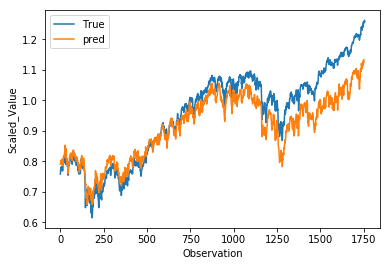

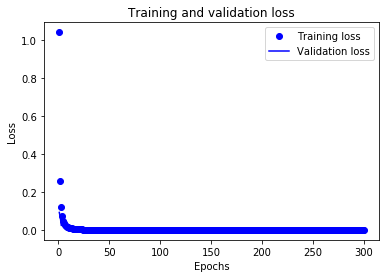

NYA_de5_tcn_clf9_n32_pe0.01:
(1756,)
The Adjusted R2 score on the Test set is:	0.782
The Custom  sign score on the Test set is:	0.492
The Custom  R2 score on the Test set is:	0.637
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 32)        1568        input_2[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 32)        2080        tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation

6808/6808==============================] - 4s 615us/sample - loss: 0.0246 - val_loss: 0.0060
Epoch 8/300
6808/6808==============================] - 4s 622us/sample - loss: 0.0191 - val_loss: 0.0059
Epoch 9/300
6808/6808==============================] - 4s 620us/sample - loss: 0.0152 - val_loss: 0.0058
Epoch 10/300
6808/6808==============================] - 4s 616us/sample - loss: 0.0125 - val_loss: 0.0042
Epoch 11/300
6808/6808==============================] - 4s 610us/sample - loss: 0.0106 - val_loss: 0.0048
Epoch 12/300
6808/6808==============================] - 4s 605us/sample - loss: 0.0096 - val_loss: 0.0057
Epoch 13/300
6808/6808==============================] - 4s 613us/sample - loss: 0.0075 - val_loss: 0.0050
Epoch 14/300
6808/6808==============================] - 4s 625us/sample - loss: 0.0065 - val_loss: 0.0042
Epoch 15/300
6808/6808==============================] - 4s 622us/sample - loss: 0.0059 - val_loss: 0.0032
Epoch 16/300
6808/6808==============================] - 4s 62

6808/6808==============================] - 4s 609us/sample - loss: 2.4351e-04 - val_loss: 0.0044
Epoch 83/300
6808/6808==============================] - 4s 610us/sample - loss: 2.3850e-04 - val_loss: 0.0046
Epoch 84/300
6808/6808==============================] - 4s 610us/sample - loss: 2.5907e-04 - val_loss: 0.0032
Epoch 85/300
6808/6808==============================] - 4s 613us/sample - loss: 2.3321e-04 - val_loss: 0.0041
Epoch 86/300
6808/6808==============================] - 4s 611us/sample - loss: 2.4026e-04 - val_loss: 0.0040
Epoch 87/300
6808/6808==============================] - 4s 604us/sample - loss: 2.3379e-04 - val_loss: 0.0044
Epoch 88/300
6808/6808==============================] - 4s 604us/sample - loss: 2.3083e-04 - val_loss: 0.0037
Epoch 89/300
6808/6808==============================] - 4s 606us/sample - loss: 2.2551e-04 - val_loss: 0.0033
Epoch 90/300
6808/6808==============================] - 4s 608us/sample - loss: 2.3366e-04 - val_loss: 0.0035
Epoch 91/300
6808/6808=

6808/6808==============================] - 4s 615us/sample - loss: 1.8510e-04 - val_loss: 0.0023
Epoch 157/300
6808/6808==============================] - 4s 612us/sample - loss: 1.8970e-04 - val_loss: 0.0023
Epoch 158/300
6808/6808==============================] - 4s 611us/sample - loss: 1.8412e-04 - val_loss: 0.0021
Epoch 159/300
6808/6808==============================] - 4s 609us/sample - loss: 1.8085e-04 - val_loss: 0.0022
Epoch 160/300
6808/6808==============================] - 4s 611us/sample - loss: 1.8454e-04 - val_loss: 0.0018
Epoch 161/300
6808/6808==============================] - 4s 605us/sample - loss: 1.7407e-04 - val_loss: 0.0019
Epoch 162/300
6808/6808==============================] - 4s 612us/sample - loss: 1.7222e-04 - val_loss: 0.0020
Epoch 163/300
6808/6808==============================] - 4s 602us/sample - loss: 1.7769e-04 - val_loss: 0.0022
Epoch 164/300
6808/6808==============================] - 4s 602us/sample - loss: 1.7893e-04 - val_loss: 0.0019
Epoch 165/300
6

6808/6808==============================] - 4s 610us/sample - loss: 1.3552e-04 - val_loss: 0.0024
Epoch 230/300
6808/6808==============================] - 4s 608us/sample - loss: 1.3787e-04 - val_loss: 0.0034
Epoch 231/300
6808/6808==============================] - 4s 613us/sample - loss: 1.3701e-04 - val_loss: 0.0028
Epoch 232/300
6808/6808==============================] - 4s 612us/sample - loss: 1.3285e-04 - val_loss: 0.0032
Epoch 233/300
6808/6808==============================] - 4s 616us/sample - loss: 1.3691e-04 - val_loss: 0.0030
Epoch 234/300
6808/6808==============================] - 4s 612us/sample - loss: 1.3235e-04 - val_loss: 0.0028
Epoch 235/300
6808/6808==============================] - 4s 617us/sample - loss: 1.3286e-04 - val_loss: 0.0030
Epoch 236/300
6808/6808==============================] - 4s 619us/sample - loss: 1.3433e-04 - val_loss: 0.0031
Epoch 237/300
6808/6808==============================] - 4s 616us/sample - loss: 1.3271e-04 - val_loss: 0.0032s
Epoch 238/300


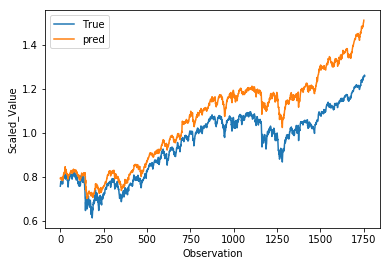

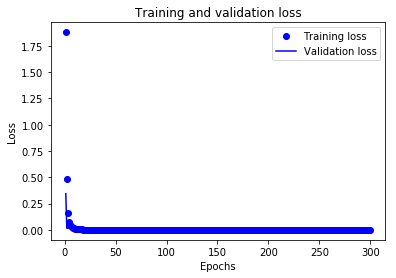

NYA_de5_tcn_clf9_n32_pe0.1:
(1756,)
The Adjusted R2 score on the Test set is:	0.310
The Custom  sign score on the Test set is:	0.503
The Custom  R2 score on the Test set is:	0.406
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 32)        1568        input_3[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 32)        2080        tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_

6808/6808==============================] - 4s 600us/sample - loss: 0.0153 - val_loss: 0.0337
Epoch 9/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0133 - val_loss: 0.0266
Epoch 10/300
6808/6808==============================] - 4s 599us/sample - loss: 0.0109 - val_loss: 0.0152
Epoch 11/300
6808/6808==============================] - 4s 598us/sample - loss: 0.0095 - val_loss: 0.0195
Epoch 12/300
6808/6808==============================] - 4s 602us/sample - loss: 0.0086 - val_loss: 0.0195
Epoch 13/300
6808/6808==============================] - 4s 598us/sample - loss: 0.0072 - val_loss: 0.0174
Epoch 14/300
6808/6808==============================] - 4s 594us/sample - loss: 0.0062 - val_loss: 0.0161
Epoch 15/300
6808/6808==============================] - 4s 582us/sample - loss: 0.0057 - val_loss: 0.0170
Epoch 16/300
6808/6808==============================] - 4s 588us/sample - loss: 0.0051 - val_loss: 0.0129
Epoch 17/300
6808/6808==============================] - 4s 5

6808/6808==============================] - 4s 584us/sample - loss: 4.9086e-04 - val_loss: 0.0084
Epoch 84/300
6808/6808==============================] - 4s 586us/sample - loss: 4.8027e-04 - val_loss: 0.0101
Epoch 85/300
6808/6808==============================] - 4s 583us/sample - loss: 4.8793e-04 - val_loss: 0.0093
Epoch 86/300
6808/6808==============================] - 4s 580us/sample - loss: 4.9516e-04 - val_loss: 0.0092
Epoch 87/300
6808/6808==============================] - 4s 583us/sample - loss: 4.7367e-04 - val_loss: 0.0100
Epoch 88/300
6808/6808==============================] - 4s 582us/sample - loss: 4.8477e-04 - val_loss: 0.0087
Epoch 89/300
6808/6808==============================] - 4s 583us/sample - loss: 4.7239e-04 - val_loss: 0.0081
Epoch 90/300
6808/6808==============================] - 4s 582us/sample - loss: 4.4971e-04 - val_loss: 0.0084
Epoch 91/300
6808/6808==============================] - 4s 579us/sample - loss: 4.5688e-04 - val_loss: 0.0085
Epoch 92/300
6808/6808=

6808/6808==============================] - 4s 584us/sample - loss: 2.6877e-04 - val_loss: 0.0035
Epoch 158/300
6808/6808==============================] - 4s 583us/sample - loss: 2.6852e-04 - val_loss: 0.0037
Epoch 159/300
6808/6808==============================] - 4s 582us/sample - loss: 2.6761e-04 - val_loss: 0.0033
Epoch 160/300
6808/6808==============================] - 4s 585us/sample - loss: 2.6108e-04 - val_loss: 0.0031
Epoch 161/300
6808/6808==============================] - 4s 579us/sample - loss: 2.7368e-04 - val_loss: 0.0031
Epoch 162/300
6808/6808==============================] - 4s 579us/sample - loss: 2.6335e-04 - val_loss: 0.0028
Epoch 163/300
6808/6808==============================] - 4s 584us/sample - loss: 2.7459e-04 - val_loss: 0.0032
Epoch 164/300
6808/6808==============================] - 4s 583us/sample - loss: 2.6298e-04 - val_loss: 0.0036
Epoch 165/300
6808/6808==============================] - 4s 582us/sample - loss: 2.6237e-04 - val_loss: 0.0037
Epoch 166/300
6

Epoch 231/300
6808/6808==============================] - 4s 584us/sample - loss: 2.1195e-04 - val_loss: 0.0031
Epoch 232/300
6808/6808==============================] - 4s 589us/sample - loss: 2.1724e-04 - val_loss: 0.0037
Epoch 233/300
6808/6808==============================] - 4s 587us/sample - loss: 2.1828e-04 - val_loss: 0.0033
Epoch 234/300
6808/6808==============================] - 4s 589us/sample - loss: 2.1144e-04 - val_loss: 0.0035
Epoch 235/300
6808/6808==============================] - 4s 585us/sample - loss: 2.0749e-04 - val_loss: 0.0029
Epoch 236/300
6808/6808==============================] - 4s 594us/sample - loss: 2.0692e-04 - val_loss: 0.0032
Epoch 237/300
6808/6808==============================] - 4s 589us/sample - loss: 2.1355e-04 - val_loss: 0.0033
Epoch 238/300
6808/6808==============================] - 4s 591us/sample - loss: 2.0847e-04 - val_loss: 0.0033
Epoch 239/300
6808/6808==============================] - 4s 585us/sample - loss: 2.0392e-04 - val_loss: 0.0036
E

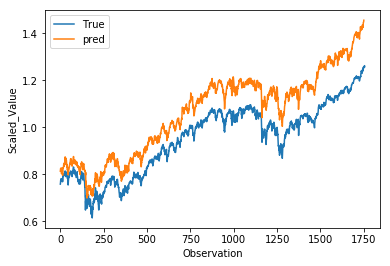

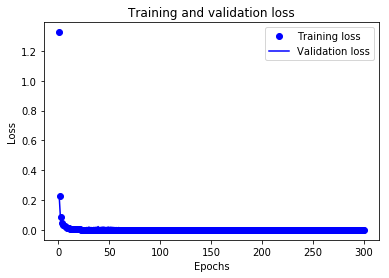

NYA_de5_tcn_clf9_n32_pe1:
(1756,)
The Adjusted R2 score on the Test set is:	0.344
The Custom  sign score on the Test set is:	0.488
The Custom  R2 score on the Test set is:	0.416
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 32)        1568        input_4[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 32)        2080        tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_18

6808/6808==============================] - 4s 593us/sample - loss: 0.0260 - val_loss: 0.1394
Epoch 9/300
6808/6808==============================] - 4s 595us/sample - loss: 0.0244 - val_loss: 0.3018
Epoch 10/300
6808/6808==============================] - 4s 596us/sample - loss: 0.0184 - val_loss: 0.2488
Epoch 11/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0150 - val_loss: 0.1966
Epoch 12/300
6808/6808==============================] - 4s 603us/sample - loss: 0.0134 - val_loss: 0.2074
Epoch 13/300
6808/6808==============================] - 4s 602us/sample - loss: 0.0121 - val_loss: 0.2316
Epoch 14/300
6808/6808==============================] - 4s 602us/sample - loss: 0.0107 - val_loss: 0.2348
Epoch 15/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0094 - val_loss: 0.1792
Epoch 16/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0081 - val_loss: 0.1969
Epoch 17/300
6808/6808==============================] - 4s 6

6808/6808==============================] - 4s 601us/sample - loss: 0.0010 - val_loss: 0.0244
Epoch 86/300
6808/6808==============================] - 4s 595us/sample - loss: 9.0951e-04 - val_loss: 0.0202
Epoch 87/300
6808/6808==============================] - 4s 602us/sample - loss: 9.5477e-04 - val_loss: 0.0251
Epoch 88/300
6808/6808==============================] - 4s 596us/sample - loss: 9.9963e-04 - val_loss: 0.0230
Epoch 89/300
6808/6808==============================] - 4s 592us/sample - loss: 9.4053e-04 - val_loss: 0.0220
Epoch 90/300
6808/6808==============================] - 4s 593us/sample - loss: 9.0947e-04 - val_loss: 0.0248
Epoch 91/300
6808/6808==============================] - 4s 593us/sample - loss: 9.2643e-04 - val_loss: 0.0235
Epoch 92/300
6808/6808==============================] - 4s 596us/sample - loss: 9.3544e-04 - val_loss: 0.0220
Epoch 93/300
6808/6808==============================] - 4s 594us/sample - loss: 9.3518e-04 - val_loss: 0.0212
Epoch 94/300
6808/6808=====

6808/6808==============================] - 4s 595us/sample - loss: 6.6031e-04 - val_loss: 0.0096
Epoch 160/300
6808/6808==============================] - 4s 598us/sample - loss: 6.3030e-04 - val_loss: 0.0081
Epoch 161/300
6808/6808==============================] - 4s 594us/sample - loss: 6.7258e-04 - val_loss: 0.0132
Epoch 162/300
6808/6808==============================] - 4s 597us/sample - loss: 6.7441e-04 - val_loss: 0.0106
Epoch 163/300
6808/6808==============================] - 4s 599us/sample - loss: 6.6566e-04 - val_loss: 0.0120
Epoch 164/300
6808/6808==============================] - 4s 594us/sample - loss: 6.7415e-04 - val_loss: 0.0103
Epoch 165/300
6808/6808==============================] - 4s 598us/sample - loss: 6.4402e-04 - val_loss: 0.0106
Epoch 166/300
6808/6808==============================] - 4s 597us/sample - loss: 6.7818e-04 - val_loss: 0.0103
Epoch 167/300
6808/6808==============================] - 4s 596us/sample - loss: 6.3121e-04 - val_loss: 0.0124
Epoch 168/300
6

Epoch 233/300
6808/6808==============================] - 4s 602us/sample - loss: 5.3113e-04 - val_loss: 0.0111
Epoch 234/300
6808/6808==============================] - 4s 602us/sample - loss: 5.2982e-04 - val_loss: 0.0134
Epoch 235/300
6808/6808==============================] - 4s 596us/sample - loss: 5.2156e-04 - val_loss: 0.0107
Epoch 236/300
6808/6808==============================] - 4s 602us/sample - loss: 5.4546e-04 - val_loss: 0.0098
Epoch 237/300
6808/6808==============================] - 4s 592us/sample - loss: 5.5626e-04 - val_loss: 0.0094
Epoch 238/300
6808/6808==============================] - 4s 594us/sample - loss: 5.1682e-04 - val_loss: 0.0088
Epoch 239/300
6808/6808==============================] - 4s 591us/sample - loss: 5.3136e-04 - val_loss: 0.0086
Epoch 240/300
6808/6808==============================] - 4s 600us/sample - loss: 4.9296e-04 - val_loss: 0.0064
Epoch 241/300
6808/6808==============================] - 4s 599us/sample - loss: 4.9121e-04 - val_loss: 0.0081
E

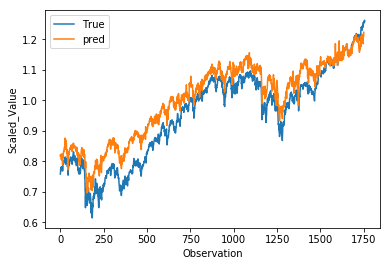

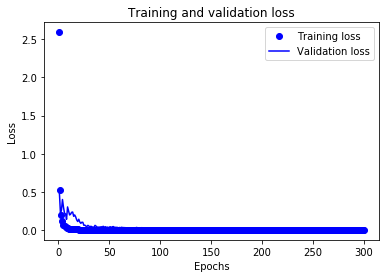

NYA_de5_tcn_clf9_n32_pe10:
(1756,)
The Adjusted R2 score on the Test set is:	0.832
The Custom  sign score on the Test set is:	0.487
The Custom  R2 score on the Test set is:	0.660
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 32)        1568        input_5[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 32)        2080        tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_2

6808/6808==============================] - 4s 602us/sample - loss: 0.3422 - val_loss: 3.8478
Epoch 9/300
6808/6808==============================] - 4s 598us/sample - loss: 0.2670 - val_loss: 3.2583
Epoch 10/300
6808/6808==============================] - 4s 599us/sample - loss: 0.1994 - val_loss: 2.1897
Epoch 11/300
6808/6808==============================] - 4s 608us/sample - loss: 0.1632 - val_loss: 1.8179
Epoch 12/300
6808/6808==============================] - 4s 605us/sample - loss: 0.1444 - val_loss: 1.6754
Epoch 13/300
6808/6808==============================] - 4s 604us/sample - loss: 0.1204 - val_loss: 0.9719
Epoch 14/300
6808/6808==============================] - 4s 602us/sample - loss: 0.1004 - val_loss: 1.1811
Epoch 15/300
6808/6808==============================] - 4s 602us/sample - loss: 0.0838 - val_loss: 0.8526
Epoch 16/300
6808/6808==============================] - 4s 607us/sample - loss: 0.0791 - val_loss: 1.4707
Epoch 17/300
6808/6808==============================] - 4s 6

6808/6808==============================] - 4s 597us/sample - loss: 0.0197 - val_loss: 0.1292
Epoch 86/300
6808/6808==============================] - 4s 606us/sample - loss: 0.0209 - val_loss: 0.1900
Epoch 87/300
6808/6808==============================] - 4s 602us/sample - loss: 0.0239 - val_loss: 0.1306
Epoch 88/300
6808/6808==============================] - 4s 601us/sample - loss: 0.0197 - val_loss: 0.1157
Epoch 89/300
6808/6808==============================] - 4s 597us/sample - loss: 0.0260 - val_loss: 0.1273
Epoch 90/300
6808/6808==============================] - 4s 593us/sample - loss: 0.0244 - val_loss: 0.1275
Epoch 91/300
6808/6808==============================] - 4s 601us/sample - loss: 0.0231 - val_loss: 0.1214
Epoch 92/300
6808/6808==============================] - 4s 598us/sample - loss: 0.0221 - val_loss: 0.1120
Epoch 93/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0230 - val_loss: 0.1762
Epoch 94/300
6808/6808==============================] - 4s 

6808/6808==============================] - 4s 606us/sample - loss: 0.0251 - val_loss: 0.0569
Epoch 162/300
6808/6808==============================] - 4s 603us/sample - loss: 0.0208 - val_loss: 0.0588
Epoch 163/300
6808/6808==============================] - 4s 604us/sample - loss: 0.0205 - val_loss: 0.0496
Epoch 164/300
6808/6808==============================] - 4s 598us/sample - loss: 0.0241 - val_loss: 0.0584
Epoch 165/300
6808/6808==============================] - 4s 601us/sample - loss: 0.0217 - val_loss: 0.0634
Epoch 166/300
6808/6808==============================] - 4s 598us/sample - loss: 0.0241 - val_loss: 0.0565
Epoch 167/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0249 - val_loss: 0.0448
Epoch 168/300
6808/6808==============================] - 4s 602us/sample - loss: 0.0230 - val_loss: 0.0788
Epoch 169/300
6808/6808==============================] - 4s 599us/sample - loss: 0.0269 - val_loss: 0.0460
Epoch 170/300
6808/6808============================

6808/6808==============================] - 4s 593us/sample - loss: 0.0220 - val_loss: 0.0146
Epoch 238/300
6808/6808==============================] - 4s 604us/sample - loss: 0.0215 - val_loss: 0.0227
Epoch 239/300
6808/6808==============================] - 4s 607us/sample - loss: 0.0189 - val_loss: 0.0204
Epoch 240/300
6808/6808==============================] - 4s 599us/sample - loss: 0.0225 - val_loss: 0.0142
Epoch 241/300
6808/6808==============================] - 4s 594us/sample - loss: 0.0209 - val_loss: 0.0141
Epoch 242/300
6808/6808==============================] - 4s 597us/sample - loss: 0.0202 - val_loss: 0.0197
Epoch 243/300
6808/6808==============================] - 4s 600us/sample - loss: 0.0190 - val_loss: 0.0157
Epoch 244/300
6808/6808==============================] - 4s 596us/sample - loss: 0.0191 - val_loss: 0.0166
Epoch 245/300
6808/6808==============================] - 4s 603us/sample - loss: 0.0192 - val_loss: 0.0152
Epoch 246/300
6808/6808============================

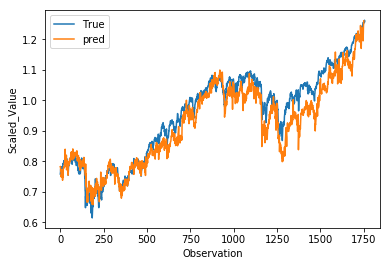

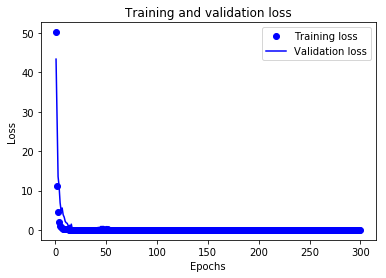

NYA_de5_tcn_clf9_n32_pe100:
(1756,)
The Adjusted R2 score on the Test set is:	0.878
The Custom  sign score on the Test set is:	0.496
The Custom  R2 score on the Test set is:	0.687
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 32)        1568        input_6[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 32)        2080        tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_

6808/6808==============================] - 4s 598us/sample - loss: 0.0168 - val_loss: 0.0495
Epoch 9/300
6808/6808==============================] - 4s 595us/sample - loss: 0.0131 - val_loss: 0.0411
Epoch 10/300
6808/6808==============================] - 4s 605us/sample - loss: 0.0103 - val_loss: 0.0326
Epoch 11/300
6808/6808==============================] - 4s 605us/sample - loss: 0.0085 - val_loss: 0.0317
Epoch 12/300
6808/6808==============================] - 4s 606us/sample - loss: 0.0071 - val_loss: 0.0258
Epoch 13/300
6808/6808==============================] - 4s 606us/sample - loss: 0.0060 - val_loss: 0.0238
Epoch 14/300
6808/6808==============================] - 4s 606us/sample - loss: 0.0051 - val_loss: 0.0176
Epoch 15/300
6808/6808==============================] - 4s 603us/sample - loss: 0.0046 - val_loss: 0.0188
Epoch 16/300
6808/6808==============================] - 4s 606us/sample - loss: 0.0039 - val_loss: 0.0163
Epoch 17/300
6808/6808==============================] - 4s 6

6808/6808==============================] - 4s 604us/sample - loss: 2.9367e-04 - val_loss: 0.0061
Epoch 83/300
6808/6808==============================] - 4s 602us/sample - loss: 2.6783e-04 - val_loss: 0.0064
Epoch 84/300
6808/6808==============================] - 4s 608us/sample - loss: 2.7864e-04 - val_loss: 0.0071
Epoch 85/300
6808/6808==============================] - 4s 605us/sample - loss: 2.6877e-04 - val_loss: 0.0061
Epoch 86/300
6808/6808==============================] - 4s 606us/sample - loss: 2.5441e-04 - val_loss: 0.0061
Epoch 87/300
6808/6808==============================] - 4s 605us/sample - loss: 2.5410e-04 - val_loss: 0.0057
Epoch 88/300
6808/6808==============================] - 4s 605us/sample - loss: 2.4876e-04 - val_loss: 0.0058
Epoch 89/300
6808/6808==============================] - 4s 606us/sample - loss: 2.5149e-04 - val_loss: 0.0056
Epoch 90/300
6808/6808==============================] - 4s 602us/sample - loss: 2.4931e-04 - val_loss: 0.0064
Epoch 91/300
6808/6808=

Epoch 156/300
6808/6808==============================] - 4s 600us/sample - loss: 1.5308e-04 - val_loss: 0.0031
Epoch 157/300
6808/6808==============================] - 4s 597us/sample - loss: 1.5087e-04 - val_loss: 0.0028
Epoch 158/300
6808/6808==============================] - 4s 601us/sample - loss: 1.4890e-04 - val_loss: 0.0030
Epoch 159/300
6808/6808==============================] - 4s 601us/sample - loss: 1.5189e-04 - val_loss: 0.0030
Epoch 160/300
6808/6808==============================] - 4s 603us/sample - loss: 1.5029e-04 - val_loss: 0.0034
Epoch 161/300
6808/6808==============================] - 4s 609us/sample - loss: 1.5774e-04 - val_loss: 0.0029
Epoch 162/300
6808/6808==============================] - 4s 610us/sample - loss: 1.5255e-04 - val_loss: 0.0030
Epoch 163/300
6808/6808==============================] - 4s 607us/sample - loss: 1.5158e-04 - val_loss: 0.0027
Epoch 164/300
6808/6808==============================] - 4s 606us/sample - loss: 1.5269e-04 - val_loss: 0.0027
E

Epoch 230/300
6808/6808==============================] - 4s 602us/sample - loss: 1.3233e-04 - val_loss: 0.0033
Epoch 231/300
6808/6808==============================] - 4s 600us/sample - loss: 1.3391e-04 - val_loss: 0.0025
Epoch 232/300
6808/6808==============================] - 4s 598us/sample - loss: 1.3270e-04 - val_loss: 0.0025
Epoch 233/300
6808/6808==============================] - 4s 609us/sample - loss: 1.3584e-04 - val_loss: 0.0028
Epoch 234/300
6808/6808==============================] - 4s 603us/sample - loss: 1.3249e-04 - val_loss: 0.0026
Epoch 235/300
6808/6808==============================] - 4s 603us/sample - loss: 1.3100e-04 - val_loss: 0.0027
Epoch 236/300
6808/6808==============================] - 4s 609us/sample - loss: 1.3190e-04 - val_loss: 0.0025
Epoch 237/300
6808/6808==============================] - 4s 606us/sample - loss: 1.2674e-04 - val_loss: 0.0024
Epoch 238/300
6808/6808==============================] - 4s 601us/sample - loss: 1.3116e-04 - val_loss: 0.0024
E

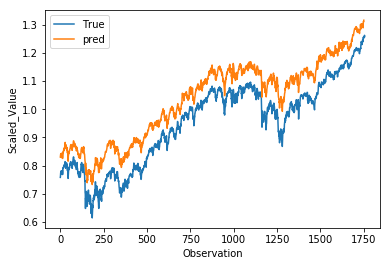

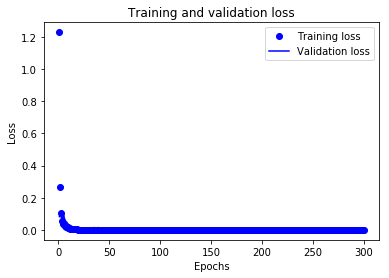

NYA_de5_tcn_clf9_n32_pex:
(1756,)
The Adjusted R2 score on the Test set is:	0.660
The Custom  sign score on the Test set is:	0.498
The Custom  R2 score on the Test set is:	0.579
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_7[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_36

6808/6808==============================] - 4s 644us/sample - loss: 0.0074 - val_loss: 0.0431
Epoch 9/300
6808/6808==============================] - 4s 641us/sample - loss: 0.0062 - val_loss: 0.0556
Epoch 10/300
6808/6808==============================] - 4s 644us/sample - loss: 0.0048 - val_loss: 0.0365
Epoch 11/300
6808/6808==============================] - 4s 645us/sample - loss: 0.0043 - val_loss: 0.0234
Epoch 12/300
6808/6808==============================] - 4s 642us/sample - loss: 0.0039 - val_loss: 0.0361
Epoch 13/300
6808/6808==============================] - 4s 648us/sample - loss: 0.0038 - val_loss: 0.0521
Epoch 14/300
6808/6808==============================] - 4s 657us/sample - loss: 0.0036 - val_loss: 0.0465
Epoch 15/300
6808/6808==============================] - 4s 649us/sample - loss: 0.0030 - val_loss: 0.0291
Epoch 16/300
6808/6808==============================] - 4s 648us/sample - loss: 0.0025 - val_loss: 0.0416
Epoch 17/300
6808/6808==============================] - 4s 6

6808/6808==============================] - 4s 645us/sample - loss: 4.5334e-04 - val_loss: 0.0178
Epoch 84/300
6808/6808==============================] - 4s 642us/sample - loss: 3.8368e-04 - val_loss: 0.0179
Epoch 85/300
6808/6808==============================] - 4s 641us/sample - loss: 4.0263e-04 - val_loss: 0.0150
Epoch 86/300
6808/6808==============================] - 4s 643us/sample - loss: 3.5881e-04 - val_loss: 0.0098
Epoch 87/300
6808/6808==============================] - 4s 639us/sample - loss: 3.4884e-04 - val_loss: 0.0104
Epoch 88/300
6808/6808==============================] - 4s 646us/sample - loss: 3.5920e-04 - val_loss: 0.0110
Epoch 89/300
6808/6808==============================] - 4s 643us/sample - loss: 3.6110e-04 - val_loss: 0.0099
Epoch 90/300
6808/6808==============================] - 4s 640us/sample - loss: 3.7555e-04 - val_loss: 0.0121
Epoch 91/300
6808/6808==============================] - 4s 642us/sample - loss: 4.0264e-04 - val_loss: 0.0105
Epoch 92/300
6808/6808=

Epoch 157/300
6808/6808==============================] - 4s 642us/sample - loss: 2.4059e-04 - val_loss: 0.0103
Epoch 158/300
6808/6808==============================] - 4s 645us/sample - loss: 2.3099e-04 - val_loss: 0.0139
Epoch 159/300
6808/6808==============================] - 4s 644us/sample - loss: 2.2314e-04 - val_loss: 0.0123
Epoch 160/300
6808/6808==============================] - 4s 643us/sample - loss: 2.2101e-04 - val_loss: 0.0138
Epoch 161/300
6808/6808==============================] - 4s 643us/sample - loss: 2.1923e-04 - val_loss: 0.0120
Epoch 162/300
6808/6808==============================] - 4s 649us/sample - loss: 1.9332e-04 - val_loss: 0.0112
Epoch 163/300
6808/6808==============================] - 4s 645us/sample - loss: 2.0744e-04 - val_loss: 0.0075
Epoch 164/300
6808/6808==============================] - 4s 645us/sample - loss: 2.0038e-04 - val_loss: 0.0088
Epoch 165/300
6808/6808==============================] - 4s 645us/sample - loss: 1.9818e-04 - val_loss: 0.0099
E

6808/6808==============================] - 4s 646us/sample - loss: 1.4880e-04 - val_loss: 0.0058
Epoch 231/300
6808/6808==============================] - 4s 645us/sample - loss: 1.3418e-04 - val_loss: 0.0050
Epoch 232/300
6808/6808==============================] - 4s 640us/sample - loss: 1.4837e-04 - val_loss: 0.0093
Epoch 233/300
6808/6808==============================] - 4s 646us/sample - loss: 1.3962e-04 - val_loss: 0.0141
Epoch 234/300
6808/6808==============================] - 4s 639us/sample - loss: 1.4838e-04 - val_loss: 0.0082
Epoch 235/300
6808/6808==============================] - 4s 650us/sample - loss: 1.3666e-04 - val_loss: 0.0067
Epoch 236/300
6808/6808==============================] - 4s 651us/sample - loss: 1.4007e-04 - val_loss: 0.0052
Epoch 237/300
6808/6808==============================] - 4s 644us/sample - loss: 1.2847e-04 - val_loss: 0.0035
Epoch 238/300
6808/6808==============================] - 4s 648us/sample - loss: 1.4422e-04 - val_loss: 0.0037
Epoch 239/300
6

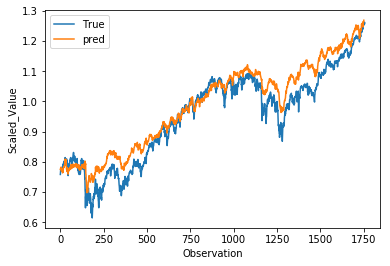

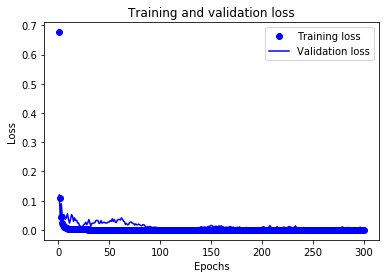

NYA_de5_tcn_clf9_n128_pe0.01:
(1756,)
The Adjusted R2 score on the Test set is:	0.886
The Custom  sign score on the Test set is:	0.497
The Custom  R2 score on the Test set is:	0.691
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_8[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activatio

6808/6808==============================] - 4s 655us/sample - loss: 0.0067 - val_loss: 0.0904
Epoch 9/300
6808/6808==============================] - 4s 652us/sample - loss: 0.0059 - val_loss: 0.0698
Epoch 10/300
6808/6808==============================] - 5s 666us/sample - loss: 0.0047 - val_loss: 0.0608
Epoch 11/300
6808/6808==============================] - 5s 688us/sample - loss: 0.0038 - val_loss: 0.0765
Epoch 12/300
6808/6808==============================] - 5s 706us/sample - loss: 0.0046 - val_loss: 0.0309
Epoch 13/300
6808/6808==============================] - 4s 632us/sample - loss: 0.0033 - val_loss: 0.0414
Epoch 14/300
6808/6808==============================] - 4s 633us/sample - loss: 0.0030 - val_loss: 0.0201
Epoch 15/300
6808/6808==============================] - 4s 632us/sample - loss: 0.0032 - val_loss: 0.0236
Epoch 16/300
6808/6808==============================] - 4s 632us/sample - loss: 0.0024 - val_loss: 0.0272
Epoch 17/300
6808/6808==============================] - 4s 6

6808/6808==============================] - 4s 634us/sample - loss: 3.6747e-04 - val_loss: 0.0027ETA: 3s - loss: 3 - ETA: 2s - loss: 3.5682 - ETA: 2s - loss: 3.3018 - ETA: 2s - loss: 3.318 - ETA: 0s - loss: 3.5638 - ETA: 0s - loss: 3.465
Epoch 81/300
6808/6808==============================] - 4s 631us/sample - loss: 3.3436e-04 - val_loss: 0.0031
Epoch 82/300
6808/6808==============================] - 4s 633us/sample - loss: 3.5335e-04 - val_loss: 0.0024
Epoch 83/300
6808/6808==============================] - 4s 638us/sample - loss: 3.2322e-04 - val_loss: 0.0017
Epoch 84/300
6808/6808==============================] - 4s 636us/sample - loss: 3.6449e-04 - val_loss: 0.0020
Epoch 85/300
6808/6808==============================] - 4s 634us/sample - loss: 3.0173e-04 - val_loss: 0.0026
Epoch 86/300
6808/6808==============================] - 4s 634us/sample - loss: 3.4485e-04 - val_loss: 0.0024
Epoch 87/300
6808/6808==============================] - 4s 635us/sample - loss: 2.9738e-04 - val_loss: 

6808/6808==============================] - 4s 627us/sample - loss: 1.5481e-04 - val_loss: 0.002034 - ETA: - ETA: 0s - loss: 1
Epoch 151/300
6808/6808==============================] - 4s 631us/sample - loss: 1.5536e-04 - val_loss: 0.0026ETA: 0s - 
Epoch 152/300
6808/6808==============================] - 4s 635us/sample - loss: 1.5290e-04 - val_loss: 0.0020
Epoch 153/300
6808/6808==============================] - 4s 634us/sample - loss: 1.4586e-04 - val_loss: 0.0026
Epoch 154/300
6808/6808==============================] - 4s 635us/sample - loss: 1.6637e-04 - val_loss: 0.0014
Epoch 155/300
6808/6808==============================] - 4s 631us/sample - loss: 1.5994e-04 - val_loss: 0.0024
Epoch 156/300
6808/6808==============================] - 4s 636us/sample - loss: 1.7467e-04 - val_loss: 0.0016
Epoch 157/300
6808/6808==============================] - 4s 633us/sample - loss: 1.6126e-04 - val_loss: 0.0024 - ETA: 3 - ETA: 2s
Epoch 158/300
6808/6808==============================] - 4s 633us/sa

6808/6808==============================] - 4s 634us/sample - loss: 1.2978e-04 - val_loss: 0.0024
Epoch 219/300
6808/6808==============================] - 4s 634us/sample - loss: 1.3431e-04 - val_loss: 0.0021 loss: 6.2174e-0 - 
Epoch 220/300
6808/6808==============================] - 4s 627us/sample - loss: 1.1895e-04 - val_loss: 0.0028
Epoch 221/300
6808/6808==============================] - 4s 633us/sample - loss: 1.2874e-04 - val_loss: 0.0027
Epoch 222/300
6808/6808==============================] - 4s 633us/sample - loss: 1.2390e-04 - val_loss: 0.0026
Epoch 223/300
6808/6808==============================] - 4s 632us/sample - loss: 1.2795e-04 - val_loss: 0.0030
Epoch 224/300
6808/6808==============================] - 4s 638us/sample - loss: 1.2271e-04 - val_loss: 0.0027
Epoch 225/300
6808/6808==============================] - 4s 632us/sample - loss: 1.2432e-04 - val_loss: 0.0033
Epoch 226/300
6808/6808==============================] - 4s 629us/sample - loss: 1.2911e-04 - val_loss: 0.0

6808/6808==============================] - 4s 633us/sample - loss: 1.2015e-04 - val_loss: 0.0033
Epoch 288/300
6808/6808==============================] - 4s 634us/sample - loss: 1.2158e-04 - val_loss: 0.0038 2s - ETA: 1s - loss:  - ETA: 1s - loss: - ETA: 0s - loss: 
Epoch 289/300
6808/6808==============================] - 4s 631us/sample - loss: 1.2233e-04 - val_loss: 0.0036
Epoch 290/300
6808/6808==============================] - 4s 626us/sample - loss: 1.2405e-04 - val_loss: 0.0060ETA
Epoch 291/300
6808/6808==============================] - 4s 629us/sample - loss: 1.3198e-04 - val_loss: 0.0047
Epoch 292/300
6808/6808==============================] - 4s 629us/sample - loss: 1.2311e-04 - val_loss: 0.0054
Epoch 293/300
6808/6808==============================] - 4s 629us/sample - loss: 1.2418e-04 - val_loss: 0.0040oss: 9.9748 - ETA: 0s - loss
Epoch 294/300
6808/6808==============================] - 4s 633us/sample - loss: 1.2108e-04 - val_loss: 0.0043loss: 1.1475e-
Epoch 295/300
6808/680

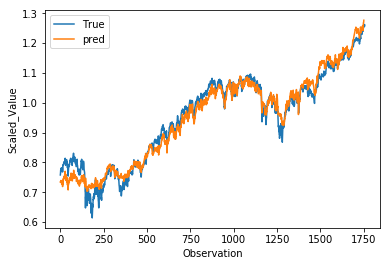

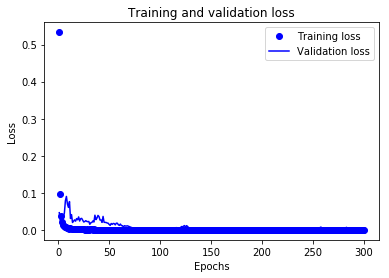

NYA_de5_tcn_clf9_n128_pe0.1:
(1756,)
The Adjusted R2 score on the Test set is:	0.957
The Custom  sign score on the Test set is:	0.498
The Custom  R2 score on the Test set is:	0.727
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_9[0][0]                    
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation

6808/6808==============================] - 4s 633us/sample - loss: 0.0094 - val_loss: 0.0585
Epoch 9/300
6808/6808==============================] - 4s 634us/sample - loss: 0.0085 - val_loss: 0.0246
Epoch 10/300
6808/6808==============================] - 4s 635us/sample - loss: 0.0081 - val_loss: 0.0235
Epoch 11/300
6808/6808==============================] - 4s 635us/sample - loss: 0.0078 - val_loss: 0.0275
Epoch 12/300
6808/6808==============================] - 4s 632us/sample - loss: 0.0066 - val_loss: 0.0212
Epoch 13/300
6808/6808==============================] - 4s 623us/sample - loss: 0.0068 - val_loss: 0.0384
Epoch 14/300
6808/6808==============================] - 4s 626us/sample - loss: 0.0041 - val_loss: 0.0438
Epoch 15/300
6808/6808==============================] - 4s 626us/sample - loss: 0.0042 - val_loss: 0.0192
Epoch 16/300
6808/6808==============================] - 4s 634us/sample - loss: 0.0036 - val_loss: 0.0185
Epoch 17/300
6808/6808==============================] - 4s 6

Epoch 83/300
6808/6808==============================] - 4s 654us/sample - loss: 6.1159e-04 - val_loss: 0.0270
Epoch 84/300
6808/6808==============================] - 4s 648us/sample - loss: 6.5512e-04 - val_loss: 0.0326
Epoch 85/300
6808/6808==============================] - 4s 645us/sample - loss: 5.7960e-04 - val_loss: 0.0211
Epoch 86/300
6808/6808==============================] - 4s 649us/sample - loss: 5.6199e-04 - val_loss: 0.0242
Epoch 87/300
6808/6808==============================] - 4s 658us/sample - loss: 4.7930e-04 - val_loss: 0.0152
Epoch 88/300
6808/6808==============================] - 4s 648us/sample - loss: 4.6250e-04 - val_loss: 0.0162
Epoch 89/300
6808/6808==============================] - 4s 659us/sample - loss: 4.6108e-04 - val_loss: 0.0139.
Epoch 90/300
6808/6808==============================] - 4s 655us/sample - loss: 4.7366e-04 - val_loss: 0.0142
Epoch 91/300
6808/6808==============================] - 4s 652us/sample - loss: 4.7679e-04 - val_loss: 0.0090
Epoch 92/

6808/6808==============================] - 4s 647us/sample - loss: 2.6563e-04 - val_loss: 0.0126ETA: 0s 
Epoch 157/300
6808/6808==============================] - 4s 653us/sample - loss: 3.0966e-04 - val_loss: 0.0123
Epoch 158/300
6808/6808==============================] - 4s 646us/sample - loss: 2.4733e-04 - val_loss: 0.0124
Epoch 159/300
6808/6808==============================] - 4s 645us/sample - loss: 2.6188e-04 - val_loss: 0.0039
Epoch 160/300
6808/6808==============================] - 4s 646us/sample - loss: 2.5970e-04 - val_loss: 0.0054
Epoch 161/300
6808/6808==============================] - 4s 645us/sample - loss: 2.6857e-04 - val_loss: 0.0037 - ETA: 0s - loss: 2.
Epoch 162/300
6808/6808==============================] - 4s 648us/sample - loss: 2.5840e-04 - val_loss: 0.0060
Epoch 163/300
6808/6808==============================] - 4s 645us/sample - loss: 2.2062e-04 - val_loss: 0.0072
Epoch 164/300
6808/6808==============================] - 4s 650us/sample - loss: 2.3051e-04 - val

6808/6808==============================] - 4s 647us/sample - loss: 1.7702e-04 - val_loss: 0.0045
Epoch 230/300
6808/6808==============================] - 4s 648us/sample - loss: 1.7518e-04 - val_loss: 0.0034
Epoch 231/300
6808/6808==============================] - 4s 647us/sample - loss: 1.7044e-04 - val_loss: 0.0021
Epoch 232/300
6808/6808==============================] - 4s 646us/sample - loss: 1.8122e-04 - val_loss: 0.0022
Epoch 233/300
6808/6808==============================] - 4s 656us/sample - loss: 1.6346e-04 - val_loss: 0.0019
Epoch 234/300
6808/6808==============================] - 4s 648us/sample - loss: 1.6163e-04 - val_loss: 0.0030
Epoch 235/300
6808/6808==============================] - 4s 660us/sample - loss: 1.6341e-04 - val_loss: 0.0020
Epoch 236/300
6808/6808==============================] - 4s 648us/sample - loss: 1.7882e-04 - val_loss: 0.0021
Epoch 237/300
6808/6808==============================] - 4s 652us/sample - loss: 1.7122e-04 - val_loss: 0.0032
Epoch 238/300
6

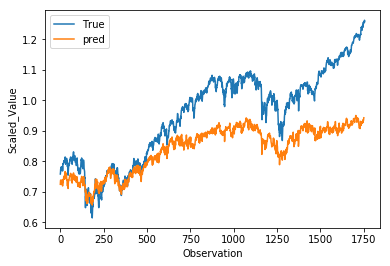

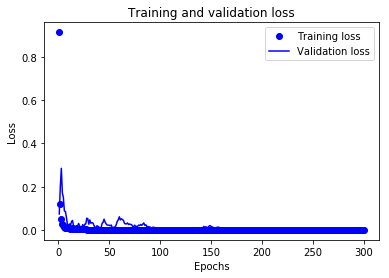

NYA_de5_tcn_clf9_n128_pe1:
(1756,)
The Adjusted R2 score on the Test set is:	0.123
The Custom  sign score on the Test set is:	0.504
The Custom  R2 score on the Test set is:	0.314
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_10[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_5

6808/6808==============================] - 4s 627us/sample - loss: 0.0263 - val_loss: 0.2666 loss: 0.026
Epoch 9/300
6808/6808==============================] - 4s 629us/sample - loss: 0.0220 - val_loss: 0.1557
Epoch 10/300
6808/6808==============================] - 4s 630us/sample - loss: 0.0190 - val_loss: 0.2000s - lo
Epoch 11/300
6808/6808==============================] - 4s 627us/sample - loss: 0.0167 - val_loss: 0.1459
Epoch 12/300
6808/6808==============================] - 4s 630us/sample - loss: 0.0168 - val_loss: 0.1399
Epoch 13/300
6808/6808==============================] - 4s 632us/sample - loss: 0.0169 - val_loss: 0.0629
Epoch 14/300
6808/6808==============================] - 4s 627us/sample - loss: 0.0145 - val_loss: 0.1228
Epoch 15/300
6808/6808==============================] - 4s 629us/sample - loss: 0.0114 - val_loss: 0.1032
Epoch 16/300
6808/6808==============================] - 4s 627us/sample - loss: 0.0135 - val_loss: 0.1296
Epoch 17/300
6808/6808====================

6808/6808==============================] - 4s 624us/sample - loss: 0.0016 - val_loss: 0.0198
Epoch 86/300
6808/6808==============================] - 4s 624us/sample - loss: 0.0018 - val_loss: 0.0159
Epoch 87/300
6808/6808==============================] - 4s 627us/sample - loss: 0.0016 - val_loss: 0.0124
Epoch 88/300
6808/6808==============================] - 4s 626us/sample - loss: 0.0016 - val_loss: 0.0050
Epoch 89/300
6808/6808==============================] - 4s 630us/sample - loss: 0.0015 - val_loss: 0.0164
Epoch 90/300
6808/6808==============================] - 4s 622us/sample - loss: 0.0016 - val_loss: 0.0199
Epoch 91/300
6808/6808==============================] - 4s 622us/sample - loss: 0.0019 - val_loss: 0.0109
Epoch 92/300
6808/6808==============================] - 4s 623us/sample - loss: 0.0016 - val_loss: 0.0124
Epoch 93/300
6808/6808==============================] - 4s 623us/sample - loss: 0.0016 - val_loss: 0.0132
Epoch 94/300
6808/6808==============================] - 4s 

6808/6808==============================] - 4s 648us/sample - loss: 9.1576e-04 - val_loss: 0.0424
Epoch 162/300
6808/6808==============================] - 4s 642us/sample - loss: 0.0012 - val_loss: 0.0221
Epoch 163/300
6808/6808==============================] - 4s 639us/sample - loss: 9.2415e-04 - val_loss: 0.0295
Epoch 164/300
6808/6808==============================] - 4s 654us/sample - loss: 0.0011 - val_loss: 0.0276
Epoch 165/300
6808/6808==============================] - 4s 631us/sample - loss: 0.0010 - val_loss: 0.0383
Epoch 166/300
6808/6808==============================] - 4s 633us/sample - loss: 9.2008e-04 - val_loss: 0.0490
Epoch 167/300
6808/6808==============================] - 4s 624us/sample - loss: 8.7564e-04 - val_loss: 0.0442
Epoch 168/300
6808/6808==============================] - 4s 631us/sample - loss: 7.6129e-04 - val_loss: 0.0354
Epoch 169/300
6808/6808==============================] - 4s 625us/sample - loss: 7.1930e-04 - val_loss: 0.0212
Epoch 170/300
6808/6808====

6808/6808==============================] - 4s 627us/sample - loss: 7.5714e-04 - val_loss: 0.0091
Epoch 236/300
6808/6808==============================] - 4s 633us/sample - loss: 7.1202e-04 - val_loss: 0.0143
Epoch 237/300
6808/6808==============================] - 4s 628us/sample - loss: 7.0580e-04 - val_loss: 0.0065
Epoch 238/300
6808/6808==============================] - 4s 626us/sample - loss: 6.8561e-04 - val_loss: 0.0072
Epoch 239/300
6808/6808==============================] - 4s 623us/sample - loss: 6.3962e-04 - val_loss: 0.0057
Epoch 240/300
6808/6808==============================] - 4s 629us/sample - loss: 5.6627e-04 - val_loss: 0.0027
Epoch 241/300
6808/6808==============================] - 4s 623us/sample - loss: 5.8767e-04 - val_loss: 0.0027
Epoch 242/300
6808/6808==============================] - 4s 625us/sample - loss: 5.3397e-04 - val_loss: 0.0084
Epoch 243/300
6808/6808==============================] - 4s 628us/sample - loss: 5.6157e-04 - val_loss: 0.0092
Epoch 244/300
6

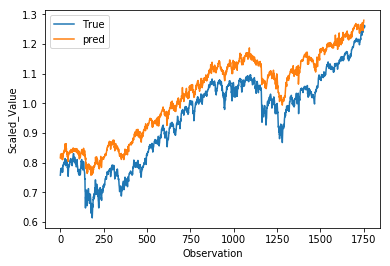

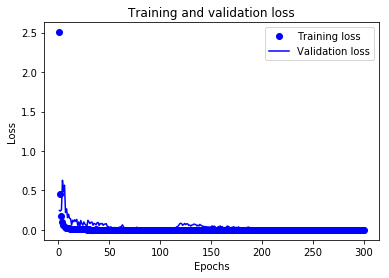

NYA_de5_tcn_clf9_n128_pe10:
(1756,)
The Adjusted R2 score on the Test set is:	0.688
The Custom  sign score on the Test set is:	0.492
The Custom  R2 score on the Test set is:	0.590
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_11[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation

6808/6808==============================] - 4s 649us/sample - loss: 0.1552 - val_loss: 3.7063
Epoch 9/300
6808/6808==============================] - 4s 656us/sample - loss: 0.1126 - val_loss: 3.5384
Epoch 10/300
6808/6808==============================] - 4s 660us/sample - loss: 0.0965 - val_loss: 2.3023
Epoch 11/300
6808/6808==============================] - 5s 662us/sample - loss: 0.0991 - val_loss: 1.9439
Epoch 12/300
6808/6808==============================] - 5s 668us/sample - loss: 0.0774 - val_loss: 1.6488
Epoch 13/300
6808/6808==============================] - 4s 659us/sample - loss: 0.0693 - val_loss: 1.4475
Epoch 14/300
6808/6808==============================] - 5s 665us/sample - loss: 0.0721 - val_loss: 0.7729
Epoch 15/300
6808/6808==============================] - 4s 652us/sample - loss: 0.0544 - val_loss: 0.7533
Epoch 16/300
6808/6808==============================] - 4s 653us/sample - loss: 0.0551 - val_loss: 0.4259
Epoch 17/300
6808/6808==============================] - 4s 6

Epoch 85/300
6808/6808==============================] - 4s 649us/sample - loss: 0.0221 - val_loss: 0.7349
Epoch 86/300
6808/6808==============================] - 4s 660us/sample - loss: 0.0194 - val_loss: 0.8451
Epoch 87/300
6808/6808==============================] - 4s 651us/sample - loss: 0.0220 - val_loss: 0.7233
Epoch 88/300
6808/6808==============================] - 4s 653us/sample - loss: 0.0192 - val_loss: 0.7659
Epoch 89/300
6808/6808==============================] - 4s 650us/sample - loss: 0.0184 - val_loss: 0.7525
Epoch 90/300
6808/6808==============================] - 4s 653us/sample - loss: 0.0186 - val_loss: 0.7932
Epoch 91/300
6808/6808==============================] - 4s 653us/sample - loss: 0.0203 - val_loss: 0.9246
Epoch 92/300
6808/6808==============================] - 4s 653us/sample - loss: 0.0203 - val_loss: 1.3774
Epoch 93/300
6808/6808==============================] - 4s 647us/sample - loss: 0.0279 - val_loss: 0.8602
Epoch 94/300
6808/6808========================

6808/6808==============================] - 4s 652us/sample - loss: 0.0259 - val_loss: 0.3512
Epoch 162/300
6808/6808==============================] - 4s 655us/sample - loss: 0.0472 - val_loss: 0.3168
Epoch 163/300
6808/6808==============================] - 4s 653us/sample - loss: 0.0261 - val_loss: 0.2612
Epoch 164/300
6808/6808==============================] - 4s 649us/sample - loss: 0.0458 - val_loss: 0.2406
Epoch 165/300
6808/6808==============================] - 4s 651us/sample - loss: 0.0236 - val_loss: 0.3092
Epoch 166/300
6808/6808==============================] - 4s 656us/sample - loss: 0.0254 - val_loss: 0.3178
Epoch 167/300
6808/6808==============================] - 4s 655us/sample - loss: 0.0340 - val_loss: 0.2990
Epoch 168/300
6808/6808==============================] - 4s 646us/sample - loss: 0.0254 - val_loss: 0.2896
Epoch 169/300
6808/6808==============================] - 4s 656us/sample - loss: 0.0354 - val_loss: 0.2759
Epoch 170/300
6808/6808============================

6808/6808==============================] - 4s 645us/sample - loss: 0.0124 - val_loss: 0.0676
Epoch 238/300
6808/6808==============================] - 4s 648us/sample - loss: 0.0165 - val_loss: 0.0725
Epoch 239/300
6808/6808==============================] - 4s 649us/sample - loss: 0.0128 - val_loss: 0.1212
Epoch 240/300
6808/6808==============================] - 4s 652us/sample - loss: 0.0140 - val_loss: 0.1046
Epoch 241/300
6808/6808==============================] - 4s 655us/sample - loss: 0.0157 - val_loss: 0.1159
Epoch 242/300
6808/6808==============================] - 4s 650us/sample - loss: 0.0161 - val_loss: 0.0674
Epoch 243/300
6808/6808==============================] - 4s 648us/sample - loss: 0.0124 - val_loss: 0.0657
Epoch 244/300
6808/6808==============================] - 4s 651us/sample - loss: 0.0170 - val_loss: 0.0756
Epoch 245/300
6808/6808==============================] - 4s 653us/sample - loss: 0.0116 - val_loss: 0.0536
Epoch 246/300
6808/6808============================

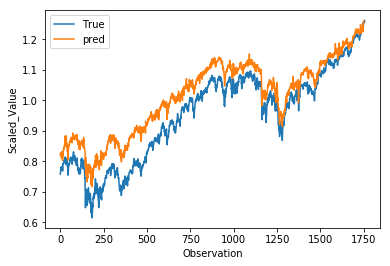

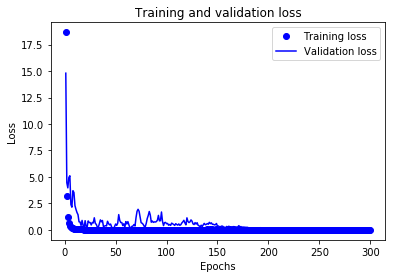

NYA_de5_tcn_clf9_n128_pe100:
(1756,)
The Adjusted R2 score on the Test set is:	0.771
The Custom  sign score on the Test set is:	0.501
The Custom  R2 score on the Test set is:	0.636
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 128)       6272        input_12[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 128)       32896       tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activatio

6808/6808==============================] - 4s 639us/sample - loss: 0.0076 - val_loss: 0.0577
Epoch 9/300
6808/6808==============================] - 4s 636us/sample - loss: 0.0061 - val_loss: 0.0614
Epoch 10/300
6808/6808==============================] - 4s 641us/sample - loss: 0.0051 - val_loss: 0.0741
Epoch 11/300
6808/6808==============================] - 4s 636us/sample - loss: 0.0042 - val_loss: 0.0160
Epoch 12/300
6808/6808==============================] - 4s 642us/sample - loss: 0.0036 - val_loss: 0.0349
Epoch 13/300
6808/6808==============================] - 4s 643us/sample - loss: 0.0034 - val_loss: 0.0188
Epoch 14/300
6808/6808==============================] - 4s 637us/sample - loss: 0.0041 - val_loss: 0.0100
Epoch 15/300
6808/6808==============================] - 4s 637us/sample - loss: 0.0030 - val_loss: 0.0051
Epoch 16/300
6808/6808==============================] - 4s 657us/sample - loss: 0.0031 - val_loss: 0.0135
Epoch 17/300
6808/6808==============================] - 4s 6

6808/6808==============================] - 4s 635us/sample - loss: 3.1448e-04 - val_loss: 0.0014
Epoch 83/300
6808/6808==============================] - 4s 643us/sample - loss: 3.1570e-04 - val_loss: 0.0016
Epoch 84/300
6808/6808==============================] - 4s 635us/sample - loss: 3.3528e-04 - val_loss: 0.0013
Epoch 85/300
6808/6808==============================] - 4s 657us/sample - loss: 3.2098e-04 - val_loss: 0.0014
Epoch 86/300
6808/6808==============================] - 4s 634us/sample - loss: 3.2058e-04 - val_loss: 0.0015
Epoch 87/300
6808/6808==============================] - 4s 640us/sample - loss: 3.1917e-04 - val_loss: 0.0015
Epoch 88/300
6808/6808==============================] - 4s 631us/sample - loss: 3.1410e-04 - val_loss: 0.0017
Epoch 89/300
6808/6808==============================] - 4s 637us/sample - loss: 3.0304e-04 - val_loss: 0.0013
Epoch 90/300
6808/6808==============================] - 4s 633us/sample - loss: 2.9990e-04 - val_loss: 0.0016
Epoch 91/300
6808/6808=

6808/6808==============================] - 4s 635us/sample - loss: 1.6030e-04 - val_loss: 0.0036
Epoch 156/300
6808/6808==============================] - 4s 644us/sample - loss: 1.6083e-04 - val_loss: 0.0038
Epoch 157/300
6808/6808==============================] - 4s 636us/sample - loss: 1.6279e-04 - val_loss: 0.0044
Epoch 158/300
6808/6808==============================] - 4s 641us/sample - loss: 1.5711e-04 - val_loss: 0.0033
Epoch 159/300
6808/6808==============================] - 4s 643us/sample - loss: 1.5898e-04 - val_loss: 0.0048
Epoch 160/300
6808/6808==============================] - 4s 642us/sample - loss: 1.6328e-04 - val_loss: 0.0050
Epoch 161/300
6808/6808==============================] - 4s 644us/sample - loss: 1.6029e-04 - val_loss: 0.0058
Epoch 162/300
6808/6808==============================] - 4s 641us/sample - loss: 1.6811e-04 - val_loss: 0.0059
Epoch 163/300
6808/6808==============================] - 4s 644us/sample - loss: 1.9160e-04 - val_loss: 0.0055
Epoch 164/300
6

Epoch 228/300
6808/6808==============================] - 4s 639us/sample - loss: 1.2017e-04 - val_loss: 0.0047
Epoch 229/300
6808/6808==============================] - 4s 639us/sample - loss: 1.1866e-04 - val_loss: 0.0043
Epoch 230/300
6808/6808==============================] - 4s 639us/sample - loss: 1.3421e-04 - val_loss: 0.0066
Epoch 231/300
6808/6808==============================] - 4s 641us/sample - loss: 1.4017e-04 - val_loss: 0.0056
Epoch 232/300
6808/6808==============================] - 4s 638us/sample - loss: 1.3748e-04 - val_loss: 0.0043
Epoch 233/300
6808/6808==============================] - 4s 642us/sample - loss: 1.3028e-04 - val_loss: 0.0035
Epoch 234/300
6808/6808==============================] - 4s 637us/sample - loss: 1.4790e-04 - val_loss: 0.0037
Epoch 235/300
6808/6808==============================] - 4s 640us/sample - loss: 1.3423e-04 - val_loss: 0.0032
Epoch 236/300
6808/6808==============================] - 4s 639us/sample - loss: 1.3624e-04 - val_loss: 0.0047
E

y_pred.shape: (1756, 1)
y_test_rsquare.shape: (1756,)
R-Squared: 0.624996
The Adjusted R2 score on the Test set is:	0.614


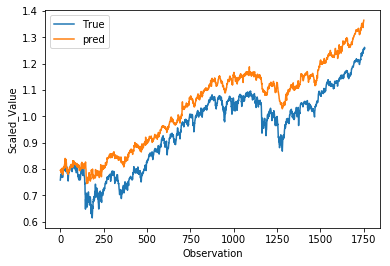

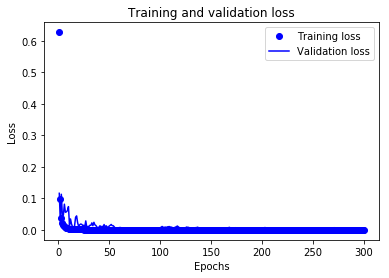

NYA_de5_tcn_clf9_n128_pex:
(1756,)
The Adjusted R2 score on the Test set is:	0.614
The Custom  sign score on the Test set is:	0.504
The Custom  R2 score on the Test set is:	0.559
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_13[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_

6808/6808==============================] - 6s 848us/sample - loss: 0.0092 - val_loss: 0.0684
Epoch 9/300
6808/6808==============================] - 6s 851us/sample - loss: 0.0093 - val_loss: 0.0920
Epoch 10/300
6808/6808==============================] - 6s 850us/sample - loss: 0.0068 - val_loss: 0.0416
Epoch 11/300
6808/6808==============================] - 6s 851us/sample - loss: 0.0055 - val_loss: 0.0464
Epoch 12/300
6808/6808==============================] - 6s 850us/sample - loss: 0.0050 - val_loss: 0.0816
Epoch 13/300
6808/6808==============================] - 6s 851us/sample - loss: 0.0051 - val_loss: 0.0921
Epoch 14/300
6808/6808==============================] - 6s 850us/sample - loss: 0.0046 - val_loss: 0.0497
Epoch 15/300
6808/6808==============================] - 6s 849us/sample - loss: 0.0055 - val_loss: 0.0239
Epoch 16/300
6808/6808==============================] - 6s 852us/sample - loss: 0.0050 - val_loss: 0.0565
Epoch 17/300
6808/6808==============================] - 6s 8

Epoch 84/300
6808/6808==============================] - 6s 850us/sample - loss: 3.2295e-04 - val_loss: 0.0110
Epoch 85/300
6808/6808==============================] - 6s 850us/sample - loss: 3.0999e-04 - val_loss: 0.0089
Epoch 86/300
6808/6808==============================] - 6s 851us/sample - loss: 2.8867e-04 - val_loss: 0.0143
Epoch 87/300
6808/6808==============================] - 6s 850us/sample - loss: 3.0805e-04 - val_loss: 0.0105
Epoch 88/300
6808/6808==============================] - 6s 849us/sample - loss: 2.8757e-04 - val_loss: 0.0115
Epoch 89/300
6808/6808==============================] - 6s 849us/sample - loss: 3.1121e-04 - val_loss: 0.0131
Epoch 90/300
6808/6808==============================] - 6s 853us/sample - loss: 2.7751e-04 - val_loss: 0.0106
Epoch 91/300
6808/6808==============================] - 6s 881us/sample - loss: 2.7554e-04 - val_loss: 0.0107
Epoch 92/300
6808/6808==============================] - 6s 834us/sample - loss: 2.5318e-04 - val_loss: 0.0104
Epoch 93/3

Epoch 158/300
6808/6808==============================] - 6s 826us/sample - loss: 1.6117e-04 - val_loss: 0.0041
Epoch 159/300
6808/6808==============================] - 6s 829us/sample - loss: 1.7427e-04 - val_loss: 0.0040
Epoch 160/300
6808/6808==============================] - 6s 826us/sample - loss: 1.7119e-04 - val_loss: 0.0047
Epoch 161/300
6808/6808==============================] - 6s 830us/sample - loss: 1.7556e-04 - val_loss: 0.0047
Epoch 162/300
6808/6808==============================] - 6s 829us/sample - loss: 1.5699e-04 - val_loss: 0.0042
Epoch 163/300
6808/6808==============================] - 6s 826us/sample - loss: 1.5903e-04 - val_loss: 0.0030
Epoch 164/300
6808/6808==============================] - 6s 829us/sample - loss: 1.6144e-04 - val_loss: 0.0034
Epoch 165/300
6808/6808==============================] - 6s 829us/sample - loss: 1.5338e-04 - val_loss: 0.0035 - ET
Epoch 166/300
6808/6808==============================] - 6s 829us/sample - loss: 1.6159e-04 - val_loss: 0.0

6808/6808==============================] - 6s 838us/sample - loss: 1.3089e-04 - val_loss: 0.0025
Epoch 232/300
6808/6808==============================] - 6s 832us/sample - loss: 1.2555e-04 - val_loss: 0.0019
Epoch 233/300
6808/6808==============================] - 6s 832us/sample - loss: 1.3298e-04 - val_loss: 0.0029
Epoch 234/300
6808/6808==============================] - 6s 834us/sample - loss: 1.2753e-04 - val_loss: 0.0036
Epoch 235/300
6808/6808==============================] - 6s 829us/sample - loss: 1.2603e-04 - val_loss: 0.0030
Epoch 236/300
6808/6808==============================] - 6s 829us/sample - loss: 1.3153e-04 - val_loss: 0.0028
Epoch 237/300
6808/6808==============================] - 6s 827us/sample - loss: 1.2120e-04 - val_loss: 0.0029
Epoch 238/300
6808/6808==============================] - 6s 829us/sample - loss: 1.2264e-04 - val_loss: 0.0030
Epoch 239/300
6808/6808==============================] - 6s 827us/sample - loss: 1.3232e-04 - val_loss: 0.0030
Epoch 240/300
6

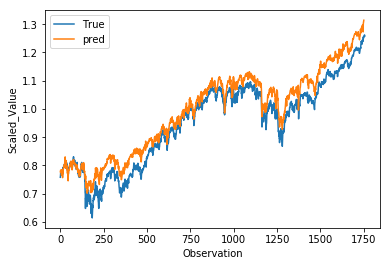

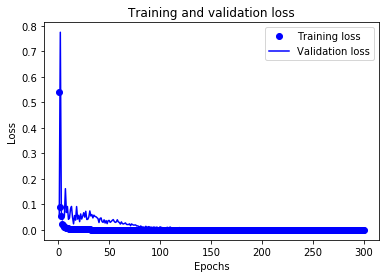

NYA_de5_tcn_clf9_n512_pe0.01:
(1756,)
The Adjusted R2 score on the Test set is:	0.892
The Custom  sign score on the Test set is:	0.503
The Custom  R2 score on the Test set is:	0.698
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_14[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activati

6808/6808==============================] - 6s 843us/sample - loss: 0.0089 - val_loss: 0.0296
Epoch 9/300
6808/6808==============================] - 6s 844us/sample - loss: 0.0068 - val_loss: 0.0359
Epoch 10/300
6808/6808==============================] - 6s 841us/sample - loss: 0.0085 - val_loss: 0.0665
Epoch 11/300
6808/6808==============================] - 6s 841us/sample - loss: 0.0056 - val_loss: 0.0464
Epoch 12/300
6808/6808==============================] - 6s 844us/sample - loss: 0.0061 - val_loss: 0.0359
Epoch 13/300
6808/6808==============================] - 6s 847us/sample - loss: 0.0064 - val_loss: 0.0235
Epoch 14/300
6808/6808==============================] - 6s 846us/sample - loss: 0.0045 - val_loss: 0.0729
Epoch 15/300
6808/6808==============================] - 6s 844us/sample - loss: 0.0055 - val_loss: 0.0216
Epoch 16/300
6808/6808==============================] - 6s 844us/sample - loss: 0.0044 - val_loss: 0.0437
Epoch 17/300
6808/6808==============================] - 6s 8

Epoch 84/300
6808/6808==============================] - 6s 834us/sample - loss: 3.1583e-04 - val_loss: 0.0161
Epoch 85/300
6808/6808==============================] - 6s 834us/sample - loss: 2.9999e-04 - val_loss: 0.0167
Epoch 86/300
6808/6808==============================] - 6s 839us/sample - loss: 3.0537e-04 - val_loss: 0.0185
Epoch 87/300
6808/6808==============================] - 6s 834us/sample - loss: 3.0687e-04 - val_loss: 0.0175
Epoch 88/300
6808/6808==============================] - 6s 834us/sample - loss: 3.1844e-04 - val_loss: 0.0160
Epoch 89/300
6808/6808==============================] - 6s 834us/sample - loss: 3.0396e-04 - val_loss: 0.0152
Epoch 90/300
6808/6808==============================] - 6s 834us/sample - loss: 2.9425e-04 - val_loss: 0.0135
Epoch 91/300
6808/6808==============================] - 6s 836us/sample - loss: 2.4725e-04 - val_loss: 0.0146
Epoch 92/300
6808/6808==============================] - 6s 839us/sample - loss: 2.7252e-04 - val_loss: 0.0137
Epoch 93/3

Epoch 158/300
6808/6808==============================] - 6s 839us/sample - loss: 1.8581e-04 - val_loss: 0.0061
Epoch 159/300
6808/6808==============================] - 6s 837us/sample - loss: 1.7511e-04 - val_loss: 0.0054
Epoch 160/300
6808/6808==============================] - 6s 834us/sample - loss: 1.7748e-04 - val_loss: 0.0042
Epoch 161/300
6808/6808==============================] - 6s 843us/sample - loss: 1.7060e-04 - val_loss: 0.0050
Epoch 162/300
6808/6808==============================] - 6s 839us/sample - loss: 1.8160e-04 - val_loss: 0.0057
Epoch 163/300
6808/6808==============================] - 6s 846us/sample - loss: 1.7657e-04 - val_loss: 0.0058
Epoch 164/300
6808/6808==============================] - 6s 839us/sample - loss: 1.7426e-04 - val_loss: 0.0053
Epoch 165/300
6808/6808==============================] - 6s 839us/sample - loss: 1.7137e-04 - val_loss: 0.0052
Epoch 166/300
6808/6808==============================] - 6s 832us/sample - loss: 1.7282e-04 - val_loss: 0.0055
E

6808/6808==============================] - 6s 829us/sample - loss: 1.2739e-04 - val_loss: 0.0023
Epoch 232/300
6808/6808==============================] - 6s 829us/sample - loss: 1.4559e-04 - val_loss: 0.0019
Epoch 233/300
6808/6808==============================] - 6s 829us/sample - loss: 1.3379e-04 - val_loss: 0.0029
Epoch 234/300
6808/6808==============================] - 6s 829us/sample - loss: 1.3682e-04 - val_loss: 0.0025
Epoch 235/300
6808/6808==============================] - 6s 829us/sample - loss: 1.4035e-04 - val_loss: 0.0033
Epoch 236/300
6808/6808==============================] - 6s 829us/sample - loss: 1.3751e-04 - val_loss: 0.0039
Epoch 237/300
6808/6808==============================] - 6s 829us/sample - loss: 1.3348e-04 - val_loss: 0.0025
Epoch 238/300
6808/6808==============================] - 6s 829us/sample - loss: 1.3366e-04 - val_loss: 0.0036
Epoch 239/300
6808/6808==============================] - 6s 832us/sample - loss: 1.2820e-04 - val_loss: 0.0024
Epoch 240/300
6

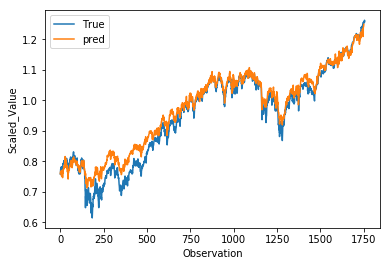

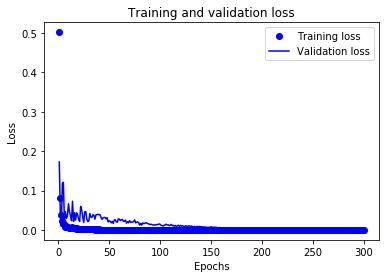

NYA_de5_tcn_clf9_n512_pe0.1:
(1756,)
The Adjusted R2 score on the Test set is:	0.946
The Custom  sign score on the Test set is:	0.504
The Custom  R2 score on the Test set is:	0.725
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_15[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activatio

6808/6808==============================] - 6s 858us/sample - loss: 0.0132 - val_loss: 0.0151
Epoch 9/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0086 - val_loss: 0.0129
Epoch 10/300
6808/6808==============================] - 6s 861us/sample - loss: 0.0112 - val_loss: 0.0855
Epoch 11/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0107 - val_loss: 0.0739
Epoch 12/300
6808/6808==============================] - 6s 869us/sample - loss: 0.0082 - val_loss: 0.0111
Epoch 13/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0061 - val_loss: 0.0050
Epoch 14/300
6808/6808==============================] - 6s 863us/sample - loss: 0.0057 - val_loss: 0.0206
Epoch 15/300
6808/6808==============================] - 6s 861us/sample - loss: 0.0048 - val_loss: 0.0427
Epoch 16/300
6808/6808==============================] - 6s 858us/sample - loss: 0.0078 - val_loss: 0.0434
Epoch 17/300
6808/6808==============================] - 6s 8

6808/6808==============================] - 6s 865us/sample - loss: 4.2143e-04 - val_loss: 0.0135
Epoch 85/300
6808/6808==============================] - 6s 864us/sample - loss: 3.9697e-04 - val_loss: 0.0094
Epoch 86/300
6808/6808==============================] - 6s 865us/sample - loss: 3.8887e-04 - val_loss: 0.0119
Epoch 87/300
6808/6808==============================] - 6s 864us/sample - loss: 3.9014e-04 - val_loss: 0.0108
Epoch 88/300
6808/6808==============================] - 6s 866us/sample - loss: 3.7669e-04 - val_loss: 0.0094
Epoch 89/300
6808/6808==============================] - 6s 861us/sample - loss: 3.3849e-04 - val_loss: 0.0104
Epoch 90/300
6808/6808==============================] - 6s 866us/sample - loss: 3.5598e-04 - val_loss: 0.0132
Epoch 91/300
6808/6808==============================] - 6s 864us/sample - loss: 3.5568e-04 - val_loss: 0.0110
Epoch 92/300
6808/6808==============================] - 6s 861us/sample - loss: 3.5084e-04 - val_loss: 0.0159
Epoch 93/300
6808/6808=

6808/6808==============================] - 6s 863us/sample - loss: 2.1215e-04 - val_loss: 0.0094
Epoch 159/300
6808/6808==============================] - 6s 863us/sample - loss: 2.1062e-04 - val_loss: 0.0085
Epoch 160/300
6808/6808==============================] - 6s 861us/sample - loss: 2.1441e-04 - val_loss: 0.0084
Epoch 161/300
6808/6808==============================] - 6s 861us/sample - loss: 2.0298e-04 - val_loss: 0.0094
Epoch 162/300
6808/6808==============================] - 6s 866us/sample - loss: 2.2008e-04 - val_loss: 0.0087
Epoch 163/300
6808/6808==============================] - 6s 861us/sample - loss: 2.0849e-04 - val_loss: 0.0089
Epoch 164/300
6808/6808==============================] - 6s 861us/sample - loss: 2.0491e-04 - val_loss: 0.0088
Epoch 165/300
6808/6808==============================] - 6s 861us/sample - loss: 2.0120e-04 - val_loss: 0.0087
Epoch 166/300
6808/6808==============================] - 6s 863us/sample - loss: 2.0498e-04 - val_loss: 0.0071
Epoch 167/300
6

Epoch 232/300
6808/6808==============================] - 6s 863us/sample - loss: 1.7317e-04 - val_loss: 0.0043
Epoch 233/300
6808/6808==============================] - 6s 866us/sample - loss: 1.6409e-04 - val_loss: 0.0048
Epoch 234/300
6808/6808==============================] - 6s 869us/sample - loss: 1.7077e-04 - val_loss: 0.0028
Epoch 235/300
6808/6808==============================] - 6s 861us/sample - loss: 1.6206e-04 - val_loss: 0.0039
Epoch 236/300
6808/6808==============================] - 6s 863us/sample - loss: 1.6490e-04 - val_loss: 0.0045
Epoch 237/300
6808/6808==============================] - 6s 861us/sample - loss: 1.5996e-04 - val_loss: 0.0038
Epoch 238/300
6808/6808==============================] - 6s 861us/sample - loss: 1.7650e-04 - val_loss: 0.0039
Epoch 239/300
6808/6808==============================] - 6s 861us/sample - loss: 1.5773e-04 - val_loss: 0.0041
Epoch 240/300
6808/6808==============================] - 6s 863us/sample - loss: 1.5399e-04 - val_loss: 0.0029
E

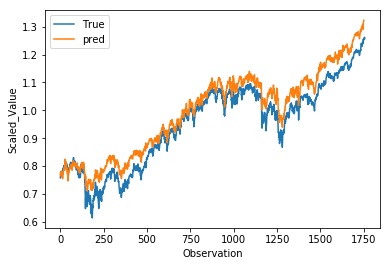

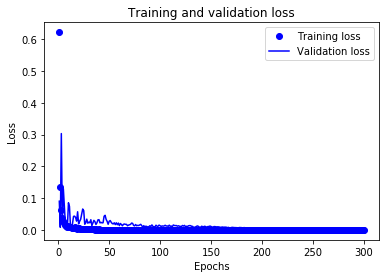

NYA_de5_tcn_clf9_n512_pe1:
(1756,)
The Adjusted R2 score on the Test set is:	0.881
The Custom  sign score on the Test set is:	0.501
The Custom  R2 score on the Test set is:	0.691
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_16[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation_

6808/6808==============================] - 6s 863us/sample - loss: 0.0447 - val_loss: 0.1863
Epoch 9/300
6808/6808==============================] - 6s 864us/sample - loss: 0.0394 - val_loss: 0.1438
Epoch 10/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0341 - val_loss: 0.7959
Epoch 11/300
6808/6808==============================] - 6s 863us/sample - loss: 0.0283 - val_loss: 0.0107
Epoch 12/300
6808/6808==============================] - 6s 871us/sample - loss: 0.0264 - val_loss: 0.0605
Epoch 13/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0253 - val_loss: 0.1444
Epoch 14/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0261 - val_loss: 0.0333
Epoch 15/300
6808/6808==============================] - 6s 864us/sample - loss: 0.0200 - val_loss: 0.1069
Epoch 16/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0175 - val_loss: 0.1593
Epoch 17/300
6808/6808==============================] - 6s 8

6808/6808==============================] - 6s 866us/sample - loss: 0.0011 - val_loss: 0.0184 - lo
Epoch 86/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0012 - val_loss: 0.0379
Epoch 87/300
6808/6808==============================] - 6s 863us/sample - loss: 0.0012 - val_loss: 0.0344
Epoch 88/300
6808/6808==============================] - 6s 863us/sample - loss: 0.0011 - val_loss: 0.0199
Epoch 89/300
6808/6808==============================] - 6s 863us/sample - loss: 0.0011 - val_loss: 0.0239
Epoch 90/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0010 - val_loss: 0.0167
Epoch 91/300
6808/6808==============================] - 6s 863us/sample - loss: 9.3187e-04 - val_loss: 0.0255
Epoch 92/300
6808/6808==============================] - 6s 861us/sample - loss: 9.9369e-04 - val_loss: 0.0330
Epoch 93/300
6808/6808==============================] - 6s 864us/sample - loss: 9.8425e-04 - val_loss: 0.0281
Epoch 94/300
6808/6808====================

6808/6808==============================] - 6s 865us/sample - loss: 6.2803e-04 - val_loss: 0.0109
Epoch 160/300
6808/6808==============================] - 6s 861us/sample - loss: 6.3251e-04 - val_loss: 0.0091
Epoch 161/300
6808/6808==============================] - 6s 864us/sample - loss: 6.7324e-04 - val_loss: 0.0106
Epoch 162/300
6808/6808==============================] - 6s 863us/sample - loss: 6.6227e-04 - val_loss: 0.0088
Epoch 163/300
6808/6808==============================] - 6s 861us/sample - loss: 6.0859e-04 - val_loss: 0.0119
Epoch 164/300
6808/6808==============================] - 6s 863us/sample - loss: 6.1040e-04 - val_loss: 0.0084
Epoch 165/300
6808/6808==============================] - 6s 864us/sample - loss: 6.0411e-04 - val_loss: 0.0080
Epoch 166/300
6808/6808==============================] - 6s 861us/sample - loss: 6.2366e-04 - val_loss: 0.0095
Epoch 167/300
6808/6808==============================] - 6s 863us/sample - loss: 6.4873e-04 - val_loss: 0.0089
Epoch 168/300
6

Epoch 233/300
6808/6808==============================] - 6s 863us/sample - loss: 5.0878e-04 - val_loss: 0.0091
Epoch 234/300
6808/6808==============================] - 6s 866us/sample - loss: 5.4609e-04 - val_loss: 0.0094
Epoch 235/300
6808/6808==============================] - 6s 861us/sample - loss: 5.3216e-04 - val_loss: 0.0089
Epoch 236/300
6808/6808==============================] - 6s 873us/sample - loss: 5.2575e-04 - val_loss: 0.0106
Epoch 237/300
6808/6808==============================] - 6s 863us/sample - loss: 5.3453e-04 - val_loss: 0.0113
Epoch 238/300
6808/6808==============================] - 6s 863us/sample - loss: 4.9473e-04 - val_loss: 0.0108
Epoch 239/300
6808/6808==============================] - 6s 861us/sample - loss: 5.1764e-04 - val_loss: 0.0106
Epoch 240/300
6808/6808==============================] - 6s 865us/sample - loss: 5.3604e-04 - val_loss: 0.0079
Epoch 241/300
6808/6808==============================] - 6s 864us/sample - loss: 5.5231e-04 - val_loss: 0.0077
E

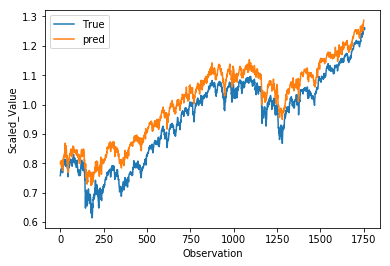

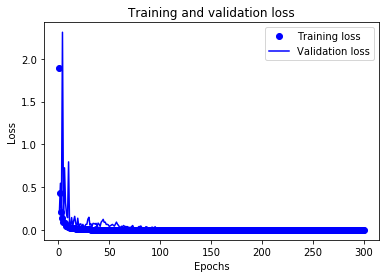

NYA_de5_tcn_clf9_n512_pe10:
(1756,)
The Adjusted R2 score on the Test set is:	0.810
The Custom  sign score on the Test set is:	0.505
The Custom  R2 score on the Test set is:	0.658
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_17[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activation

6808/6808==============================] - 6s 870us/sample - loss: 0.4885 - val_loss: 1.0848
Epoch 9/300
6808/6808==============================] - 6s 869us/sample - loss: 0.4385 - val_loss: 0.8527
Epoch 10/300
6808/6808==============================] - 6s 871us/sample - loss: 0.3492 - val_loss: 0.0421
Epoch 11/300
6808/6808==============================] - 6s 871us/sample - loss: 0.2270 - val_loss: 0.0593
Epoch 12/300
6808/6808==============================] - 6s 868us/sample - loss: 0.2976 - val_loss: 1.4357
Epoch 13/300
6808/6808==============================] - 6s 871us/sample - loss: 0.2064 - val_loss: 0.1557
Epoch 14/300
6808/6808==============================] - 6s 871us/sample - loss: 0.2027 - val_loss: 0.6377
Epoch 15/300
6808/6808==============================] - 6s 873us/sample - loss: 0.1502 - val_loss: 0.3539
Epoch 16/300
6808/6808==============================] - 6s 868us/sample - loss: 0.1340 - val_loss: 0.2297
Epoch 17/300
6808/6808==============================] - 6s 8

6808/6808==============================] - 6s 873us/sample - loss: 0.0112 - val_loss: 0.3018
Epoch 86/300
6808/6808==============================] - 6s 871us/sample - loss: 0.0111 - val_loss: 0.3452
Epoch 87/300
6808/6808==============================] - 6s 869us/sample - loss: 0.0110 - val_loss: 0.3197
Epoch 88/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0118 - val_loss: 0.3546
Epoch 89/300
6808/6808==============================] - 6s 871us/sample - loss: 0.0098 - val_loss: 0.2504
Epoch 90/300
6808/6808==============================] - 6s 871us/sample - loss: 0.0103 - val_loss: 0.2734
Epoch 91/300
6808/6808==============================] - 6s 871us/sample - loss: 0.0105 - val_loss: 0.2670
Epoch 92/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0097 - val_loss: 0.2475
Epoch 93/300
6808/6808==============================] - 6s 869us/sample - loss: 0.0100 - val_loss: 0.2986
Epoch 94/300
6808/6808==============================] - 6s 

Epoch 162/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0061 - val_loss: 0.1303
Epoch 163/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0052 - val_loss: 0.1048
Epoch 164/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0060 - val_loss: 0.1311
Epoch 165/300
6808/6808==============================] - 6s 870us/sample - loss: 0.0055 - val_loss: 0.1500
Epoch 166/300
6808/6808==============================] - 6s 869us/sample - loss: 0.0055 - val_loss: 0.1055
Epoch 167/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0055 - val_loss: 0.1108
Epoch 168/300
6808/6808==============================] - 6s 868us/sample - loss: 0.0055 - val_loss: 0.1290
Epoch 169/300
6808/6808==============================] - 6s 866us/sample - loss: 0.0053 - val_loss: 0.1148
Epoch 170/300
6808/6808==============================] - 6s 870us/sample - loss: 0.0054 - val_loss: 0.1456
Epoch 171/300
6808/6808==============

6808/6808==============================] - 6s 857us/sample - loss: 0.0048 - val_loss: 0.1726 - loss: 0.0 - ETA: 2s - loss: 0. - ETA: 2s - lo - ETA: 1s - loss: 0.00 - ETA: 1s - loss: 0.00 - ETA:  - ETA: 0s - loss: 0
Epoch 239/300
6808/6808==============================] - 6s 846us/sample - loss: 0.0047 - val_loss: 0.1945: 0. - ETA: 2s - - ETA: 1s - l - ETA: 1s - lo - ETA: 0s - lo
Epoch 240/300
6808/6808==============================] - 6s 861us/sample - loss: 0.0047 - val_loss: 0.1391- ETA: 2s - loss: 0.001 - ETA: 2s - loss: 0.001 - ETA - ETA: 1 - ETA: 0s - loss: 0.004 - ETA: 0s - loss:
Epoch 241/300
6808/6808==============================] - 6s 854us/sample - loss: 0.0053 - val_loss: 0.1748
Epoch 242/300
6808/6808==============================] - 6s 852us/sample - loss: 0.0052 - val_loss: 0.2054TA: 4s - loss: 0.002 - ETA: 4s - los - ETA: 3s - loss: 0.002 - ETA: 3s - lo  - ETA: 1s - loss: 0.003 - ETA: 1s - loss: 0.00 - ETA: 1s - loss: 0. - ETA: 1s - los - ETA: 0s - loss: 0.0 - ETA: 0s -

6808/6808==============================] - 6s 848us/sample - loss: 0.0065 - val_loss: 0.3797TA: 2s - loss - ETA: 2s - lo - ETA: 1s - loss: 0.0 
Epoch 283/300
6808/6808==============================] - 6s 845us/sample - loss: 0.0055 - val_loss: 0.3286: 0.002 - ETA: 3s - loss: 0.00 - ETA: 3 - ETA: 2s - los - ETA: 1s - loss: 0.00 - ETA: 1s - l - ETA: 0s - loss: 0.004 - ETA: 0s - loss:  - ETA: 0s - loss:
Epoch 284/300
6808/6808==============================] - 6s 847us/sample - loss: 0.0068 - val_loss: 0.3843006 - ETA: 4s - loss: 0 - ETA: 3s - - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: - ETA: 0s - lo - ETA: 0s - loss: 0.0 - ETA: 0s - loss: 0.00
Epoch 285/300
6808/6808==============================] - 6s 847us/sample - loss: 0.0062 - val_loss: 0.3647TA: 5s - los - ETA: 4s - loss: 0.002 - ETA: 4s - loss: 0.002 - ETA: 4s - loss: - ETA: 4s - loss: 0.00 - ETA: 3s - loss:  - ETA: 3s - loss:  - ETA: 0s - loss: 0.0
Epoch 286/300
6808/6808==============================] - 6s 

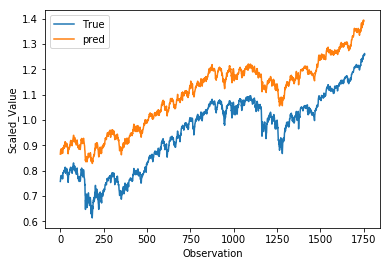

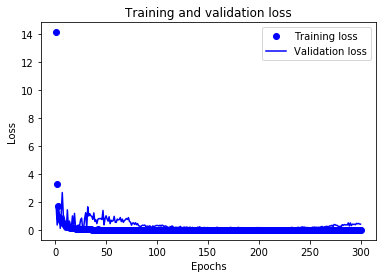

NYA_de5_tcn_clf9_n512_pe100:
(1756,)
The Adjusted R2 score on the Test set is:	-0.039
The Custom  sign score on the Test set is:	0.489
The Custom  R2 score on the Test set is:	0.225
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 1, 48)]      0                                            
__________________________________________________________________________________________________
tcn_initial_conv (Conv1D)       (None, 1, 512)       25088       input_18[0][0]                   
__________________________________________________________________________________________________
tcn_d_causal_conv_1_tanh_s0 (Co (None, 1, 512)       524800      tcn_initial_conv[0][0]           
__________________________________________________________________________________________________
activati

6808/6808==============================] - 6s 812us/sample - loss: 0.0113 - val_loss: 0.0427A: 3 - ETA:  - ETA: 1s - los - ETA: 1s - loss: - ETA: 0s - loss: 0.0 - ETA: 0s - lo - ETA: 0s - loss: 0.01
Epoch 7/300
6808/6808==============================] - 6s 815us/sample - loss: 0.0101 - val_loss: 0.0237s - loss: 0.0 - ETA: 2s - loss: - ETA: 2s - loss: 0.01 - ETA: 1s - loss: 0. - ETA: 1s - loss: - ETA: 1s - los - ETA: 0s - loss: 0.010 - ETA: 0s - los - ETA: 0s - loss: 0.0
Epoch 8/300
6808/6808==============================] - 6s 812us/sample - loss: 0.0095 - val_loss: 0.0494.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.01 - ETA: 0s - loss: 0.009 - ETA: 0s -
Epoch 9/300
6808/6808==============================] - 5s 808us/sample - loss: 0.0081 - val_loss: 0.1014ss - ETA: 1s - loss: 0.007 - ETA: 1s - lo - ETA: 0s - l
Epoch 10/300
6808/6808==============================] - 6s 810us/sample - loss: 0.0069 - val_loss: 0.0135oss: 0.01 - ETA: 2 - ETA: 1s - loss: 0.006 - ETA: 1s - loss:  - ETA:

6808/6808==============================] - 5s 807us/sample - loss: 8.4609e-04 - val_loss: 0.0326- ETA: 3s - loss: 8.386 - ETA: 2s - loss: 7.834 - ETA: 2s - ETA: 1s - loss: 6.9615e-0 - ETA: 1
Epoch 46/300
6808/6808==============================] - 5s 805us/sample - loss: 8.0236e-04 - val_loss: 0.0307TA: 0s - loss: 8.0080e-
Epoch 47/300
6808/6808==============================] - 5s 806us/sample - loss: 6.7160e-04 - val_loss: 0.0299: 3s - loss: 7 - ETA: 2s - loss: 6.4728e - ETA: 2s - loss: 6.193 - ETA: 2s - loss: 5.9298e- - ETA: 2s - loss: 5. - ETA: 1s - l - ETA: 0s - loss: 6.49 - ETA: 0s - loss: 6.682 - ETA: 0s - loss: 6.7099e-0
Epoch 48/300
6808/6808==============================] - 5s 803us/sample - loss: 7.6906e-04 - val_loss: 0.0211- loss: 7.2421e-0 - ETA: 2s - loss: - ETA: 2s - loss: 6.2513e-0 - ETA - ETA: 0s - loss: 6.8845e - ETA: 0s - loss:
Epoch 49/300
6808/6808==============================] - 5s 805us/sample - loss: 6.8754e-04 - val_loss: 0.0267A: 1s - ETA: 0s - loss: 6.7066e-0

6808/6808==============================] - 6s 820us/sample - loss: 3.0782e-04 - val_loss: 0.0160s - loss: 2.2 - ETA: 3s - loss: 2.1652e- - ETA: 3s - loss: 2.1284e - ETA: 3s - loss: 2.0873e- - ETA - ETA: 1s - loss: 2.407 - ETA: 1s - loss: 2.7296e-0 - ETA: 0s - loss: 2.8 - ETA: 0s - loss: 2
Epoch 85/300
6808/6808==============================] - 5s 807us/sample - loss: 2.9831e-04 - val_loss: 0.0146- ETA: 4s - - ETA: 3s - l - ETA: 0s - loss: 2.7340e- - ETA: 0s - loss: 2.7436e- - ETA: 0s - loss: 2.
Epoch 86/300
6808/6808==============================] - 5s 805us/sample - loss: 2.7742e-04 - val_loss: 0.0148
Epoch 87/300
6808/6808==============================] - 5s 806us/sample - loss: 3.0508e-04 - val_loss: 0.0159 - ETA: 4s  - ETA - ETA: 2s - loss: 1.5404e- - ETA: 2s - l - ETA: 1s - loss:  - ETA: 0s - loss: 2.8 - ETA: 0s - loss: 2.9179e- - ETA: 0s - loss: 2.9689e-
Epoch 88/300
6808/6808==============================] - 5s 803us/sample - loss: 2.9442e-04 - val_loss: 0.0156 3s - loss: 1 - E 

6808/6808==============================] - 5s 805us/sample - loss: 2.0427e-04 - val_loss: 0.0059lo - ETA: 0s - loss:  - ETA: 0s - loss: 1.9106e- - ETA: 0s - loss: 2.0115e-0
Epoch 121/300
6808/6808==============================] - 5s 808us/sample - loss: 2.0284e-04 - val_loss: 0.0047 4s - loss: 8.7063e-0 - ETA: 4s - loss: 8.4030e - ETA: 4s - loss: 8.3077e- - ETA: 4s - loss: 8.4178e - ETA: 4s -  - ETA: 1s - loss: 1.5282 - ETA: 1s - lo - ETA: 0s - loss: 1.9064
Epoch 122/300
6808/6808==============================] - 5s 808us/sample - loss: 1.9742e-04 - val_loss: 0.0051 2s - loss: 7.4432e- - ETA: 2s - loss: 7. - ETA: 2s - loss: 7.6877e-0 - ETA - ETA: 0s - loss: 1.7527e-0 - ETA: 0s - loss:
Epoch 123/300
6808/6808==============================] - 5s 805us/sample - loss: 1.9582e-04 - val_loss: 0.0054: 8.5593 - ETA: 1s - loss: 9.5114e-0 - ETA: 1s - loss: 9.7784 - ETA: 1s - loss: 1.31 - ETA: 1s - ETA: 0s - loss: 1.8457e-
Epoch 124/300
6808/6808==============================] - 6s 810us/sample -

6808/6808==============================] - 5s 807us/sample - loss: 1.5994e-04 - val_loss: 0.0034oss: 6.16 - ETA: 3s - loss - ETA: 2s -  - ETA: 1s - ETA: 0s - loss: 1.3920e- - ETA: 0s - loss: 1. - ETA: 0s - loss: 1.4760e
Epoch 158/300
6808/6808==============================] - 6s 813us/sample - loss: 1.6278e-04 - val_loss: 0.0032A: 1s - l - ETA: 1s 
Epoch 159/300
6808/6808==============================] - 6s 818us/sample - loss: 1.5696e-04 - val_loss: 0.0032
Epoch 160/300
6808/6808==============================] - 6s 817us/sample - loss: 1.5568e-04 - val_loss: 0.0027 ETA: 4s - loss: 6. - ETA: 4s - loss: 5. - ETA: 3s -  - ETA: 2s - loss: 5.4005e- - ETA: 2s - lo 
Epoch 161/300
6808/6808==============================] - 5s 808us/sample - loss: 1.5836e-04 - val_loss: 0.0031loss - ETA: 2s - loss: 6.0 - ETA: 2s -  - ETA: 1s - loss: 1.1400e-0 - ETA: 1s
Epoch 162/300
6808/6808==============================] - ETA: 0s - loss: 1.5220e-04- ETA: 4s - loss: 3. - ETA: 4s - loss: 6.6294 - E - ETA: 2s 

6808/6808==============================] - 6s 826us/sample - loss: 1.3891e-04 - val_loss: 0.0020A: 2s - loss: 4.2 - ETA: 2s - loss: 4.3731e - ETA: 2s - loss: 4.3424e-0 - E - ETA: 0s - loss
Epoch 193/300
6808/6808==============================] - 6s 815us/sample - loss: 1.4025e-04 - val_loss: 0.0015 - loss: 5.5 - ETA: 3s - loss: 5.1947e- - - ETA: 1s - loss: 9.8563e-0 - ETA: 1s - l - ETA: 0s - loss: 1.2
Epoch 194/300
6808/6808==============================] - 6s 810us/sample - loss: 1.3726e-04 - val_loss: 0.0020 ETA: 4s - loss: 8 - ETA: 4s - loss: 5.0325e- - ETA: 4s - ETA: 3s  - ETA: 2s -  - ETA: 1s - loss: 1.0183 - ETA: 0s - loss: 1.17 - ETA: 0s - loss: 1
Epoch 195/300
6808/6808==============================] - 6s 808us/sample - loss: 1.3476e-04 - val_loss: 0.0015 3s - loss: 3.98 - ETA: 3s - loss: 4.0305e-0 - ETA: 3s - loss: 3.9915e- - ETA: 3s - loss: 3.9710e-0 - ETA: 3s - loss: 3.9443e- - ETA: 3s - loss: 3.9040e-0 -  - ETA: 1s - loss: 6.7820e - ETA: 1s - loss: 8.8514e- - ETA: 1s - loss

6808/6808==============================] - 5s 807us/sample - loss: 1.3297e-04 - val_loss: 0.0014 4s - loss: 4. - ETA: 3s - loss: 3 - ETA: 3s - loss: 3 - ETA: 2s - loss: 3 - ETA: 2s - loss: 3.5598e-0 - ETA: 2s  - ETA: 1s - loss: 1.0631e-0 - ETA: 1s - loss: 1.14 - ETA: 0s - loss: 1.2005 - ETA: 0s - loss: 1.1981 - ETA: 0s - loss: 1.2356
Epoch 228/300
6808/6808==============================] - 6s 810us/sample - loss: 1.3421e-04 - val_loss: 0.0012 - ETA: 4s - loss: 6.6044 - ETA: 4s - loss: 5. - ETA: - ETA: 2s - l - ETA: 1s - loss: 6.6366e - ETA: 1s - loss: 8.3639e - ETA: 1s -  - ETA: 0s - loss: 1.1888e- - ETA: 0s - loss: 1.2102e-0 - ETA: 0s - loss: 1.2262
Epoch 229/300
6808/6808==============================] - 6s 813us/sample - loss: 1.3112e-04 - val_loss: 0.0021 - ETA: 3s - loss: 3.44 - ETA - ETA: 1s - loss: 8.2 - ETA: 0s - l - ETA: 0s - loss: 1.2446e-0 - ETA: 0s - loss: 1.3031e-0
Epoch 230/300
6808/6808==============================] - 6s 812us/sample - loss: 1.3082e-04 - val_loss: 0.001

6808/6808==============================] - 6s 809us/sample - loss: 1.2428e-04 - val_loss: 0.0017ETA: 3s - loss: 3.0582e-0 - ETA: 3s  - ETA: 2s - loss: 2.8689e-0 - ET - ETA: 0s - loss: 1.0 - ETA: 0s - loss: 1.0700e- - ETA: 0s - loss: 1.1230
Epoch 264/300
6808/6808==============================] - 6s 810us/sample - loss: 1.3206e-04 - val_loss: 0.0015TA: 4s - loss: 4.9526e- - ETA: 4s -  - ETA: 3s - lo - ETA: 2s - loss - ETA: 2s - loss: 3.8467e-0 - ETA: 2s - - ETA: 1s - loss: 1.0842e - ETA: 0s - loss: 1. - ETA: 0s - loss: 1.18
Epoch 265/300
6808/6808==============================] - 6s 810us/sample - loss: 1.3560e-04 - val_loss: 0.0014 - loss: 1 - ETA: 0s - loss: 1.2790e
Epoch 266/300
6808/6808==============================] - 5s 808us/sample - loss: 1.2892e-04 - val_loss: 0.00164s - loss: 3.3145e-0 - ETA: 4s - loss: 3.4 - ETA: 1s - loss: 4.8 - ETA: 1s - loss: 8.4458e - ETA: 1s - loss: 9.274 - ETA: 0s - lo - ETA: 0s - loss: 1.2152e-
Epoch 267/300
6808/6808==============================] - 

6808/6808==============================] - ETA: 0s - loss: 1.2034e-04- ETA: 5s - loss: 2.8300e-0 - ETA: 5s - loss: 3.004 - ETA: 4s - loss: 2.4688 - ETA: 4s - loss: 2.984 - ETA: 4s - loss: 2 - ETA: 3s - loss:  - ETA: 3s - loss: 3 - ETA: 2s - loss: 3.0682e- - ETA: 2s - loss: 3.0407 - ETA: 2s - loss:  - ETA: 1s - loss:  - ETA: 0s - loss: 1 - ETA: 0s - loss: 1.0 - 6s 817us/sample - loss: 1.2054e-04 - val_loss: 0.0020
Epoch 297/300
6808/6808==============================] - 6s 810us/sample - loss: 1.2572e-04 - val_loss: 0.0017 - ETA: 4s - loss:  - ETA: 4s - loss: 2.1325e- - ETA: 4s - loss: 2.5317 - ETA: 3s - loss: 3 - ETA: 3s - loss: 3.0671e-0 - ETA: 3s - loss: 3. - ETA: 2s - loss: 2.8289e-0 - ETA: 2s - loss: 2.798 - ETA: 0s - loss: 1. - ETA: 0s - loss: 1.1675e-0 - ETA: 0s - loss: 1.1847e-
Epoch 298/300
6808/6808==============================] - 6s 818us/sample - loss: 1.1944e-04 - val_loss: 0.0016 - loss: 3.128 - ETA: 3s - loss - ETA: 2 - ETA: 1s - - ETA: 0s - loss: 1.0291e- - ETA: 0s - lo

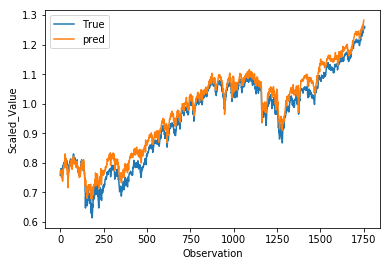

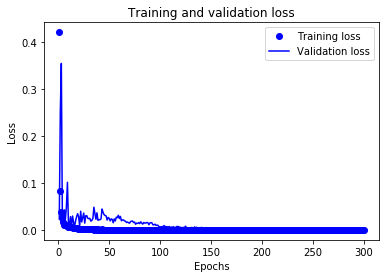

NYA_de5_tcn_clf9_n512_pex:
(1756,)
The Adjusted R2 score on the Test set is:	0.945
The Custom  sign score on the Test set is:	0.507
The Custom  R2 score on the Test set is:	0.726


In [39]:
neurons=[32,128,512]
penalties=[0.01, 0.1, 1, 10, 100, 'x']
losses = tf_stock_loss_9

for neurons_j in neurons:
    for penalty_i in penalties:
        if penalty_i == 'x':
            losses = 'mse'
        else:
            losses = tf_stock_loss_9
            penalty = penalty_i
        file_name='NYA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)

        X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
        X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

        input_tensor= Input(shape=(1,X_train.shape[1],))
        output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                activation='selu', padding='causal', use_skip_connections=True,\
                dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

        output_tensor = Dense(1)(output)
        model = Model([input_tensor], output_tensor)
        model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
        model.summary()
        early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
        
        startTime = timeit.default_timer()
        
        history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                            batch_size=16, verbose=1,
                                            validation_split= val_split_ratio, callbacks=[CSV(losspath=losspath, file_name=file_name)],
                                            shuffle=False)
        elapsedTime = timeit.default_timer() - startTime
        print("Time taken for the Network to train : ",str(datetime.timedelta(seconds=elapsedTime)))
        plot_model_architecture(model=model, file_name=file_name)
        y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                          predict_imagepath=predict_imagepath, file_name=file_name)
        loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
        save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                     file_name=file_name,test_date=test_date)
        save_train_csv(file_name=file_name)

        file_name='NYA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)
        print(file_name+":")
        custom_r2_score(file_name)

In [40]:
import numpy as np
import pandas as pd
neurons=[32,128,512]
penalties=[0.01, 0.1, 1, 10, 100, 'x']

for neurons_j in neurons:
    for penalty_i in penalties:
        if penalty_i == 'x':
            losses = 'mse'
        else:
            penalty = penalty_i
        file_name='NYA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)
        print("=============================================")
        print(file_name)
        Target_DirPath = 'Deep-Learning-in-Python-master/'
        file_end_with = '.csv'
        #above need to be adjust
        df_for_eval= pd.read_csv(Target_DirPath + file_name + file_end_with)
        df_for_eval['Date'] = pd.to_datetime(df_for_eval["Date"])
        df_for_eval = df_for_eval.set_index(["Date"], drop=True)

        y_pred_for_eval = df_for_eval["Close"]
        ## create empty table with label fields
        y_pred_for_eval_data_like = np.zeros(shape=(len(y_pred_for_eval), X_train.shape[1]))
        ## put the predicted values in the right field
        y_pred_for_eval_data_like[:,0] = y_pred_for_eval[:]
        ## transform and then select the right field
        y_pred_for_eval_data = sc.transform(y_pred_for_eval_data_like)[:,0]


        r2_test = r2_score(y_test, y_pred_for_eval_data)
        print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
                  .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

        y_test_diff = np.diff(y_test) #y_test[i]與y_test[i-1]差異
        y_pred_for_eval_data_diff = np.diff(y_pred_for_eval_data)#y_pred[i]與y_pred[i-1]差異
        rsquare_product = y_test_diff*y_pred_for_eval_data_diff #兩者相乘
        def return_same_sign_bool(d):
            d = np.array(d)
            return np.where(d > 0, 1, 0)
        rsquare_product_bool = return_same_sign_bool(rsquare_product) #如果兩者相乘為正數回傳1，非正數回傳0
        print("The Custom  sign score on the Test set is:\t{:0.3f}"\
                  .format((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))) 
                   #計算y_test及y_pred變動同向機率

        #Custom  sign score_2
        y_test_after = np.roll(y_test,-5) #y_test[i]與y_test[i-1]差異
        y_pred_for_eval_data_after = np.roll(y_pred_for_eval_data,-5)#y_pred[i]與y_pred[i-1]差異
        y_test__cl = np.subtract(y_test_after,y_test)
        y_pred_for_eval_data_cl = np.subtract(y_pred_for_eval_data_after,y_pred_for_eval_data)

        sign_raw = np.multiply(y_test__cl, y_pred_for_eval_data_cl)

        sign_bool_func = np.vectorize(lambda elements : 1 if elements <= 0  else 0)
        sign_bool = sign_bool_func(sign_raw)
        sign_bool[np.r_[-5:-1]] = 0

        print("The Custom  sign score_2 on the Test set is:\t{:0.3f}"\
                  .format((int(sum(sign_bool)) / (len(sign_bool)-5)))) 
                   #計算y_test及y_pred變動同向機率

NYA_de5_tcn_clf9_n32_pe0.01
The Adjusted R2 score on the Test set is:	0.782
The Custom  sign score on the Test set is:	0.492
The Custom  sign score_2 on the Test set is:	0.508
NYA_de5_tcn_clf9_n32_pe0.1
The Adjusted R2 score on the Test set is:	0.310
The Custom  sign score on the Test set is:	0.503
The Custom  sign score_2 on the Test set is:	0.487
NYA_de5_tcn_clf9_n32_pe1
The Adjusted R2 score on the Test set is:	0.344
The Custom  sign score on the Test set is:	0.488
The Custom  sign score_2 on the Test set is:	0.489
NYA_de5_tcn_clf9_n32_pe10
The Adjusted R2 score on the Test set is:	0.832
The Custom  sign score on the Test set is:	0.487
The Custom  sign score_2 on the Test set is:	0.487
NYA_de5_tcn_clf9_n32_pe100
The Adjusted R2 score on the Test set is:	0.878
The Custom  sign score on the Test set is:	0.496
The Custom  sign score_2 on the Test set is:	0.499
NYA_de5_tcn_clf9_n32_pex
The Adjusted R2 score on the Test set is:	0.660
The Custom  sign score on the Test set is:	0.498
The C

In [41]:
indices = tf.constant([[[0,0],[0,1]]])
updates = tf.constant([[[5, 5, 5, 5],[5, 5, 5, 5]]])
shape = tf.constant([4, 4, 4])
scatter = tf.scatter_nd(indices, updates, shape)
print(scatter)

tf.Tensor(
[[[5 5 5 5]
  [5 5 5 5]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]], shape=(4, 4, 4), dtype=int32)


In [42]:
indices = tf.constant([[[0,0],[0,1]]])
updates = tf.constant([[5, 5]])
shape = tf.constant([3, 5])
scatter = tf.scatter_nd(indices, updates, shape)
print(scatter)

tf.Tensor(
[[5 5 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(3, 5), dtype=int32)


In [43]:
de = list()
de = [0,2,6,7,8,9]
de[-1]

9